C:\Users\Jcp45\AppData\Local\Temp\ipykernel_5876\1688393185.py:7: DtypeWarning: Columns (1,2,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  census_data = pd.read_csv('Census total.csv')


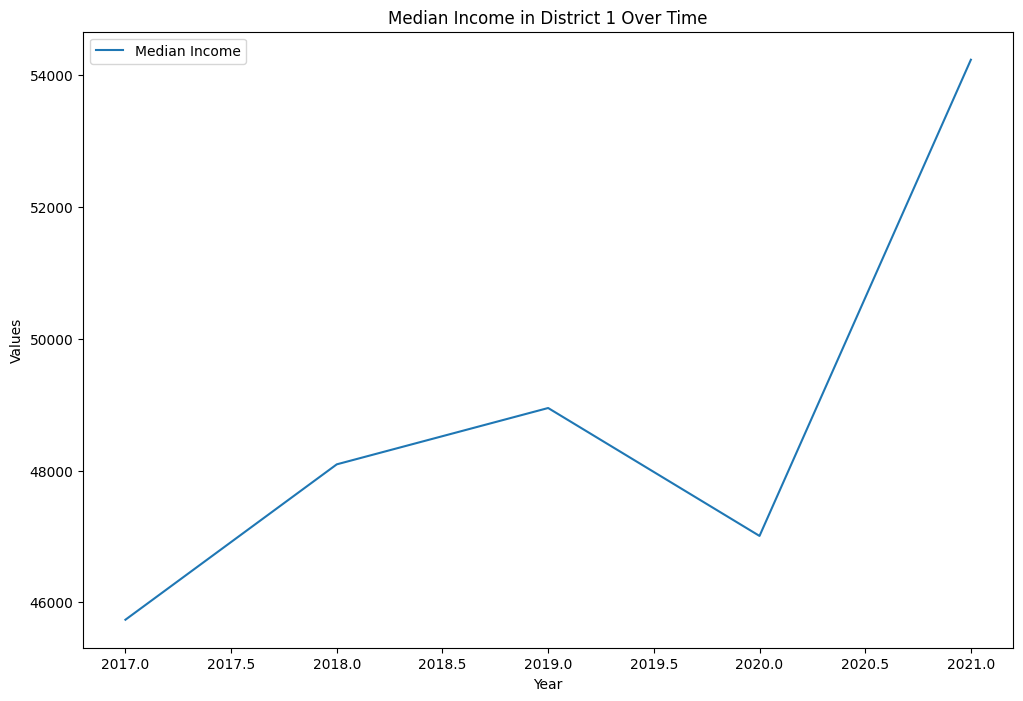

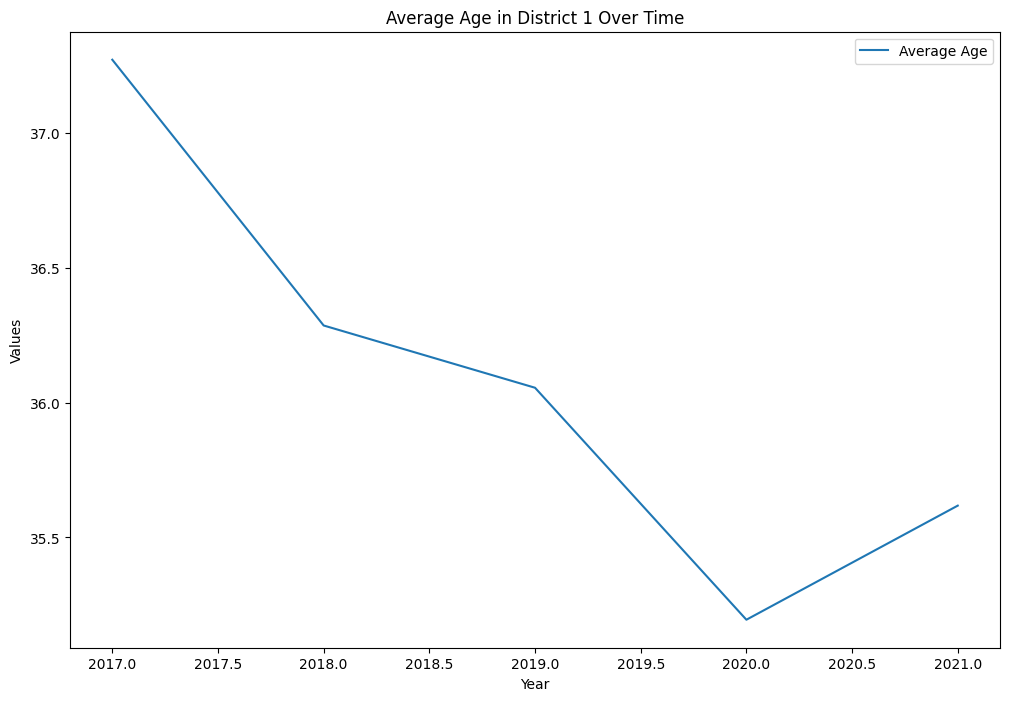

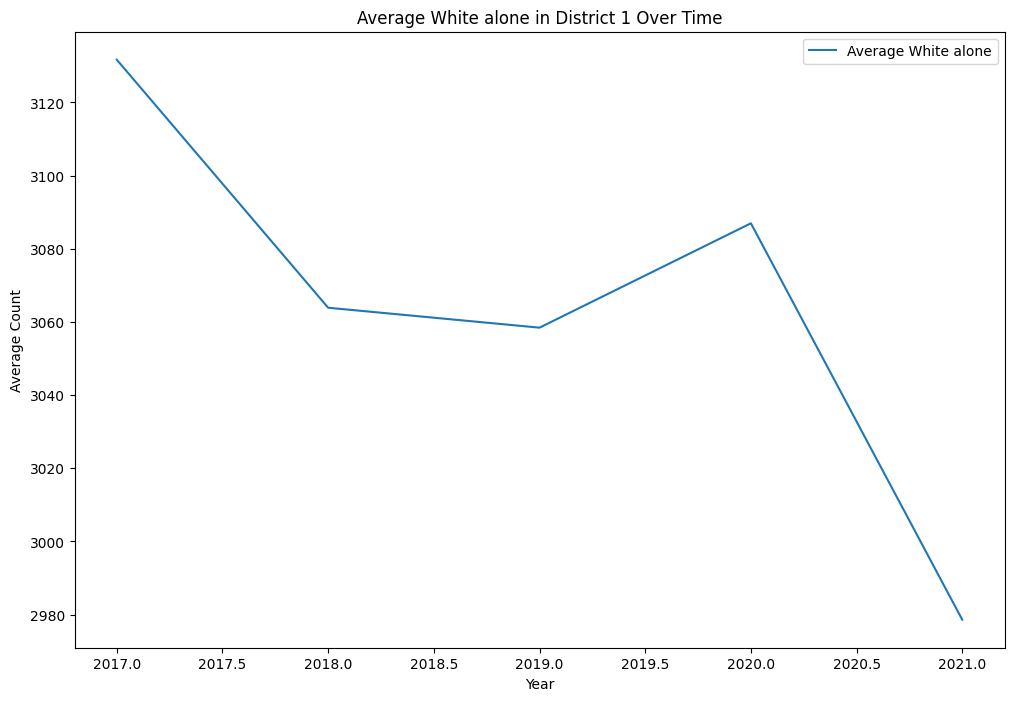

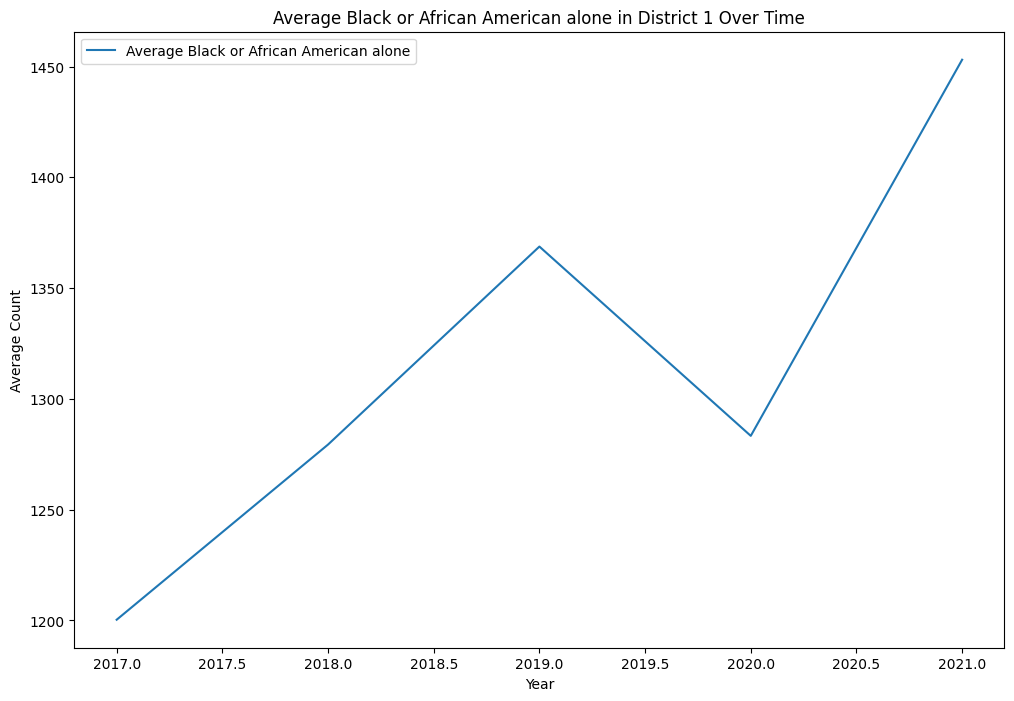

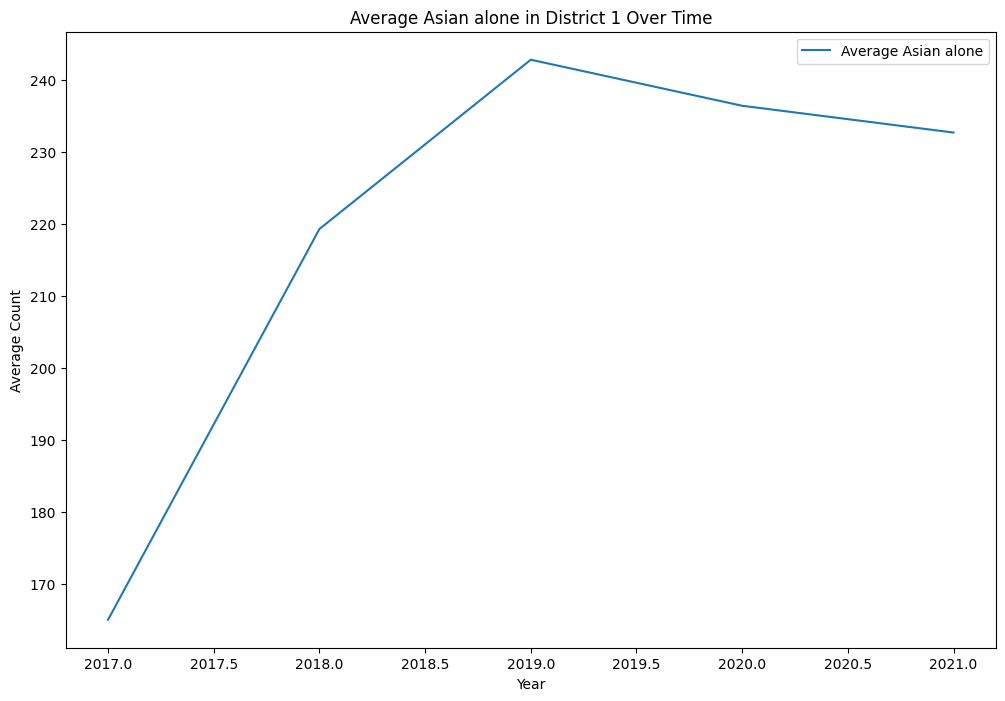

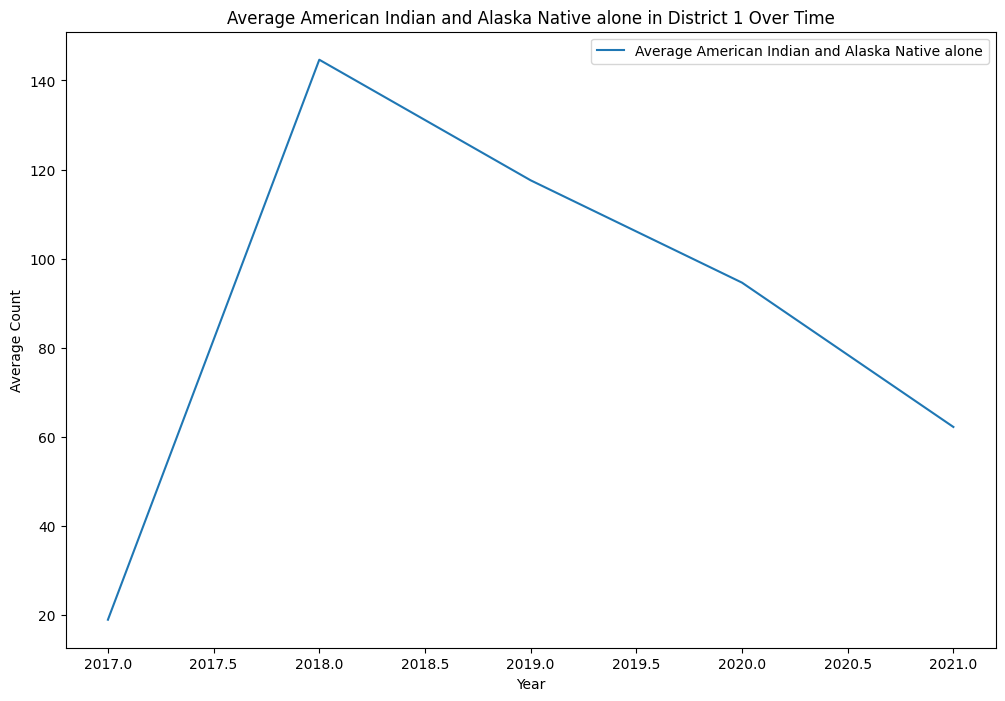

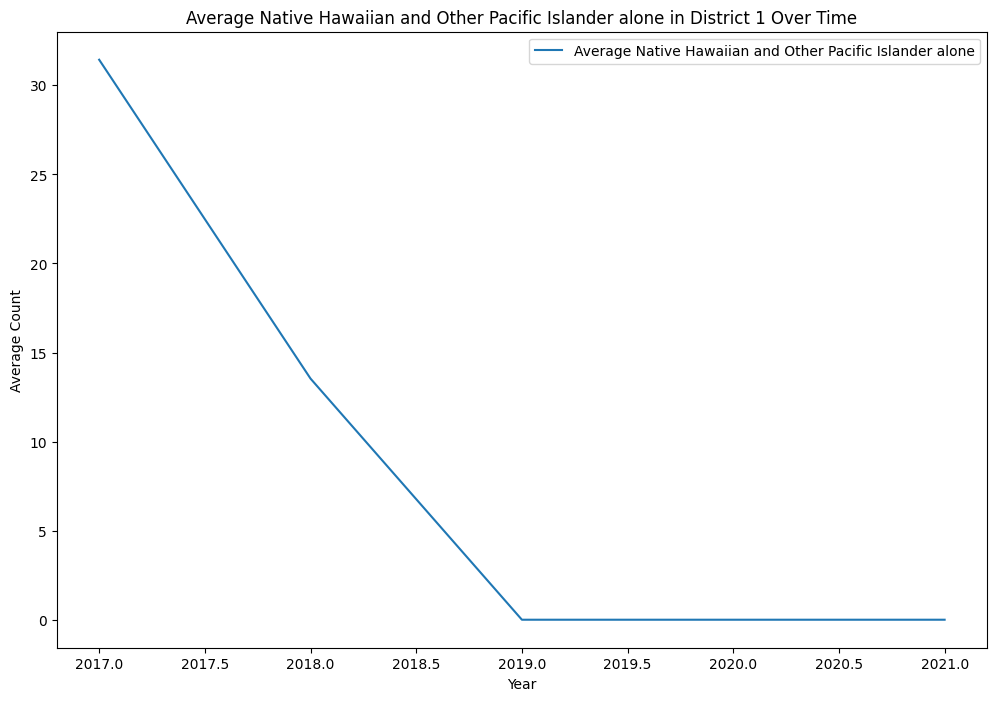

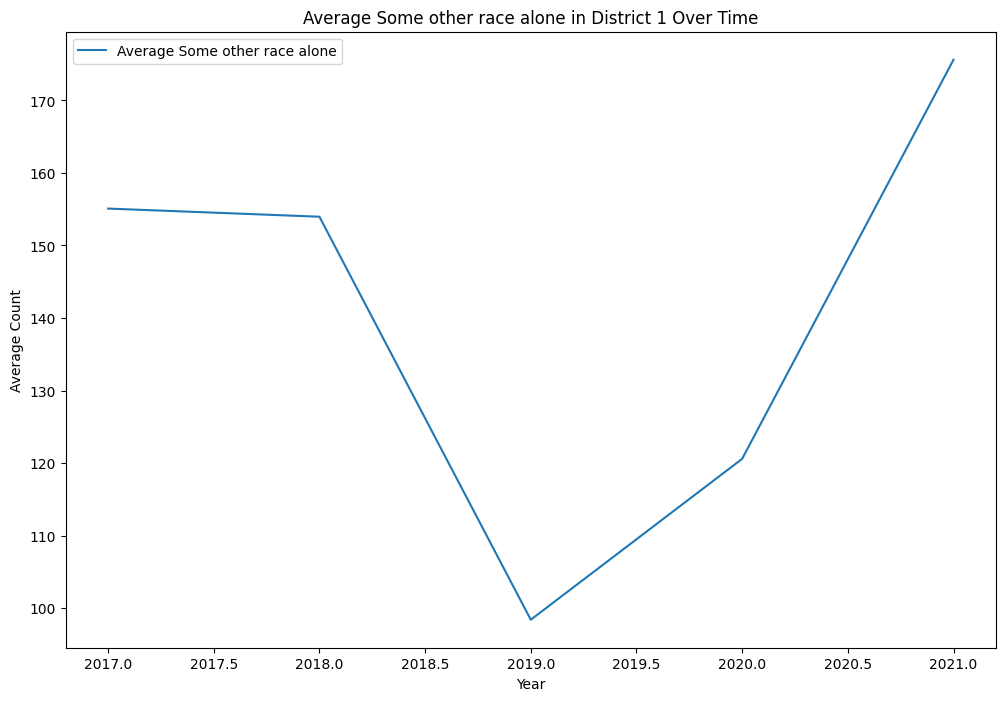

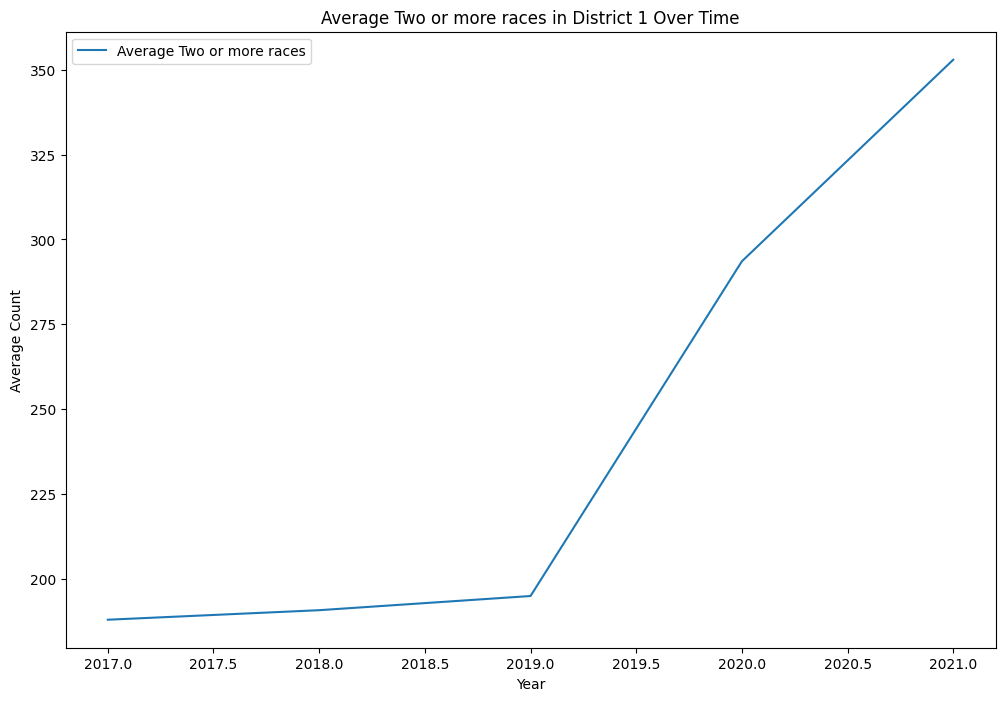

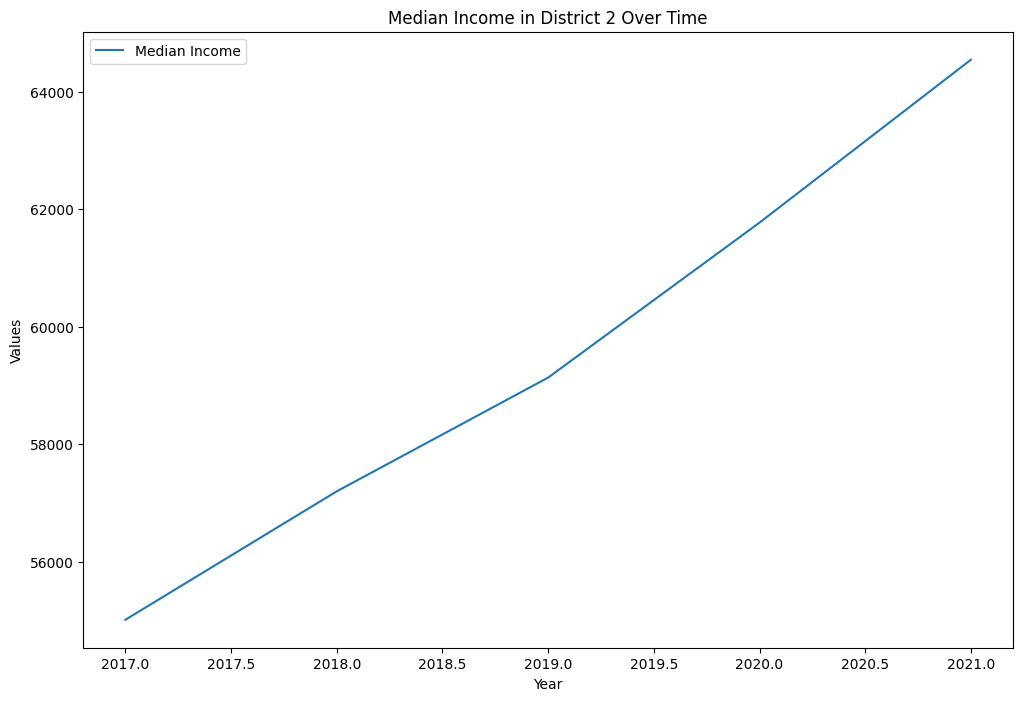

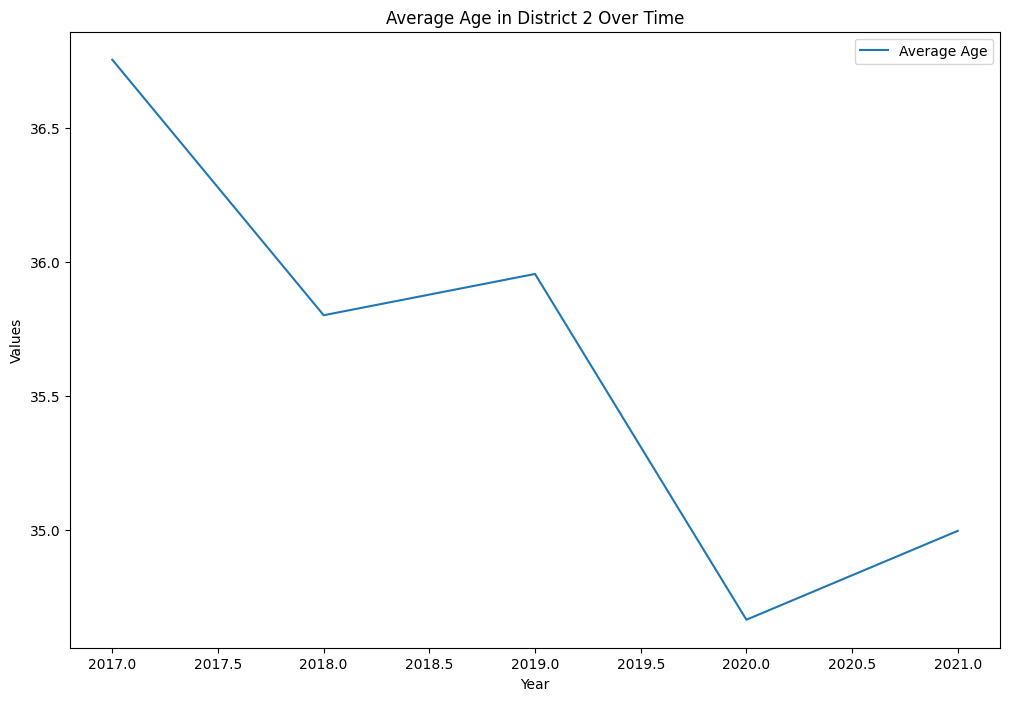

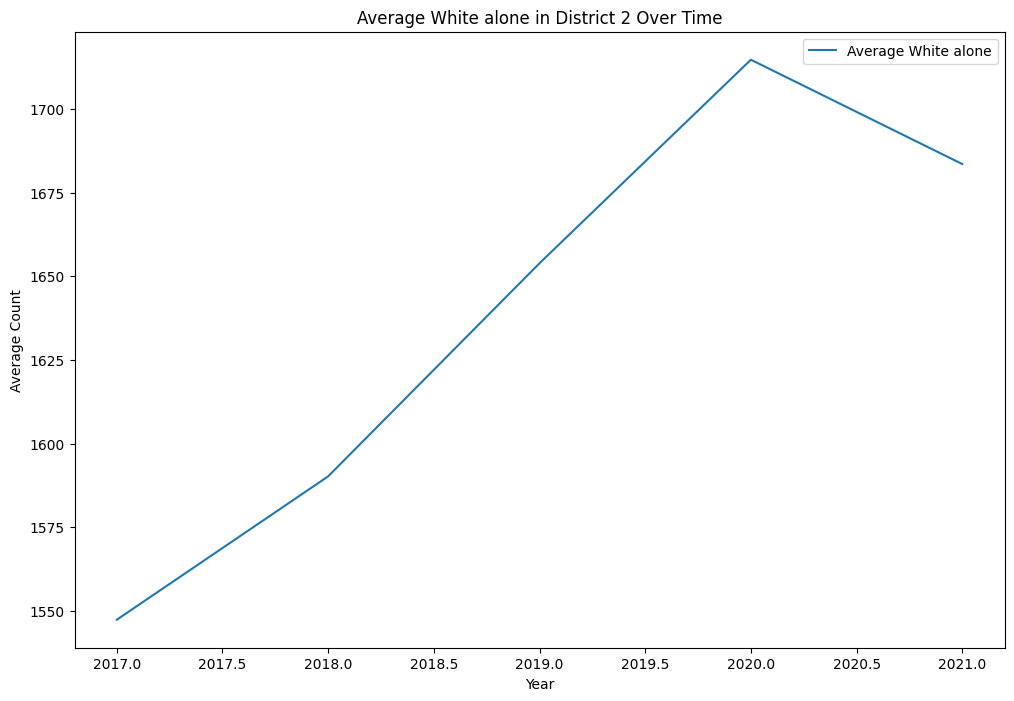

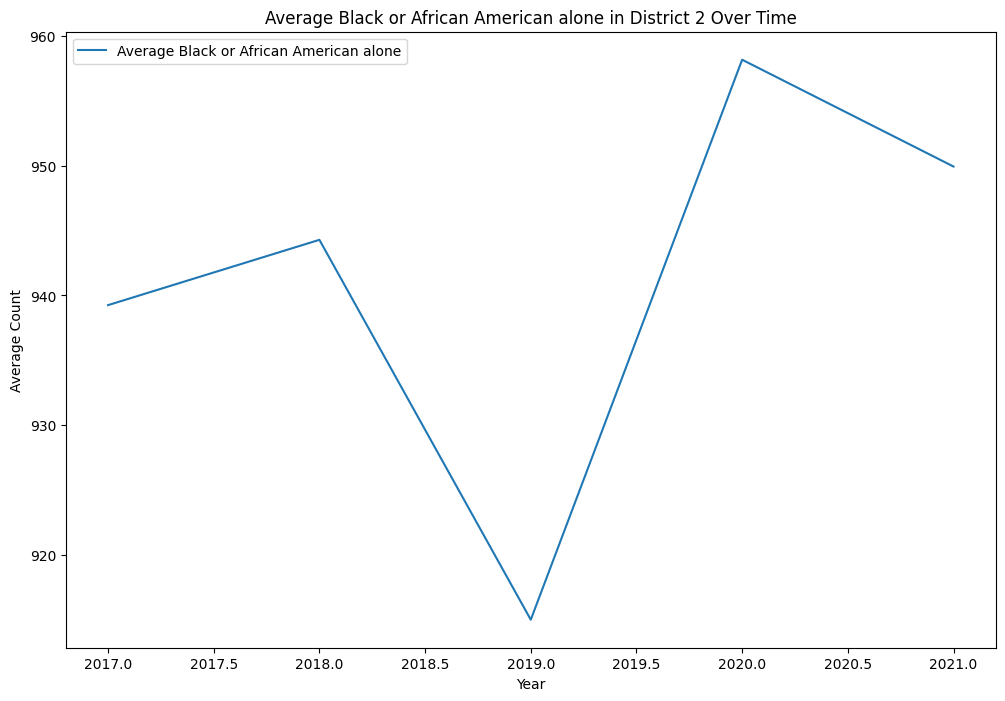

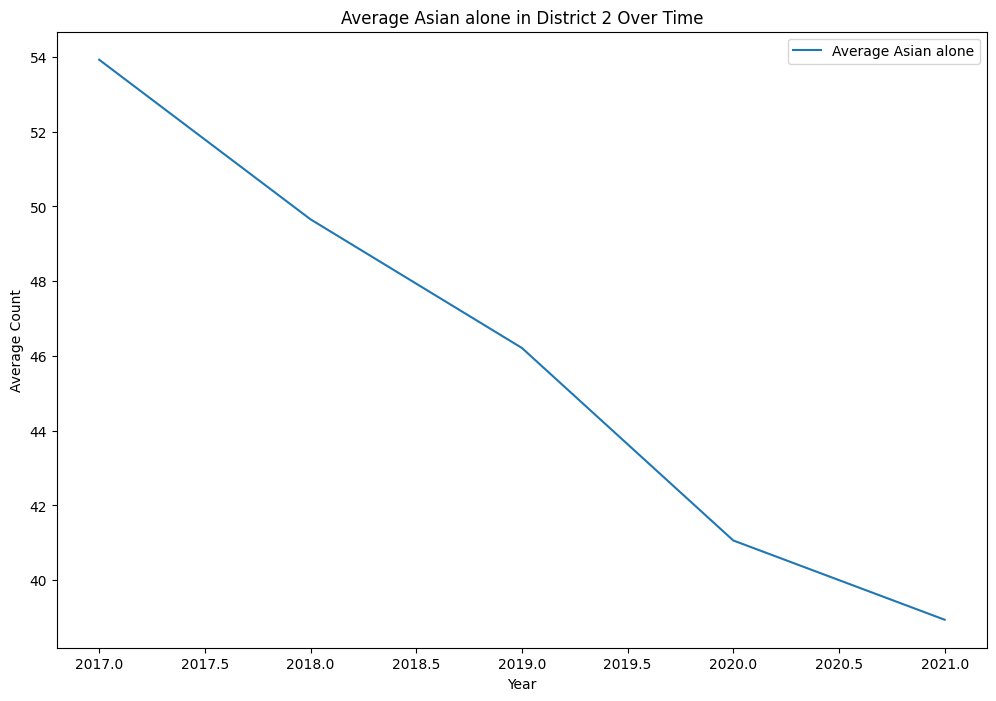

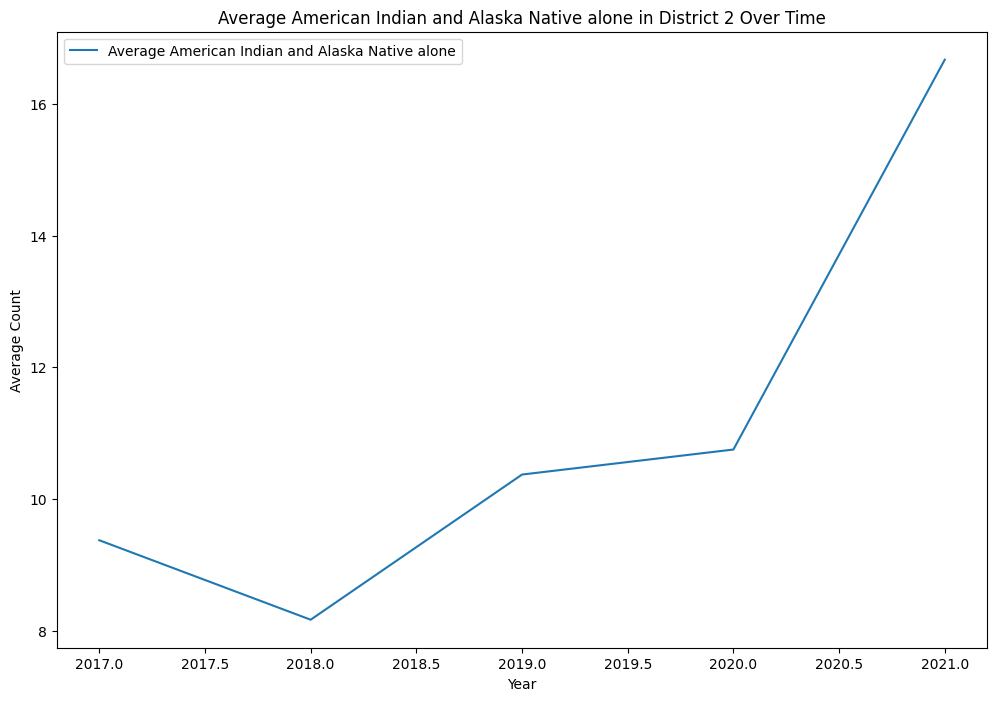

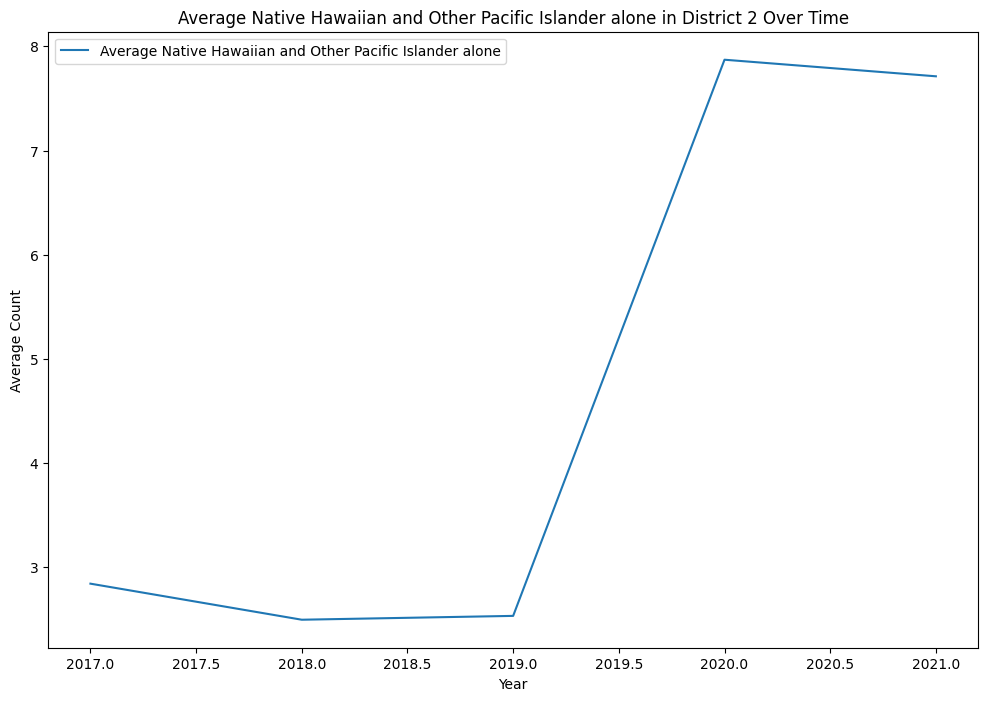

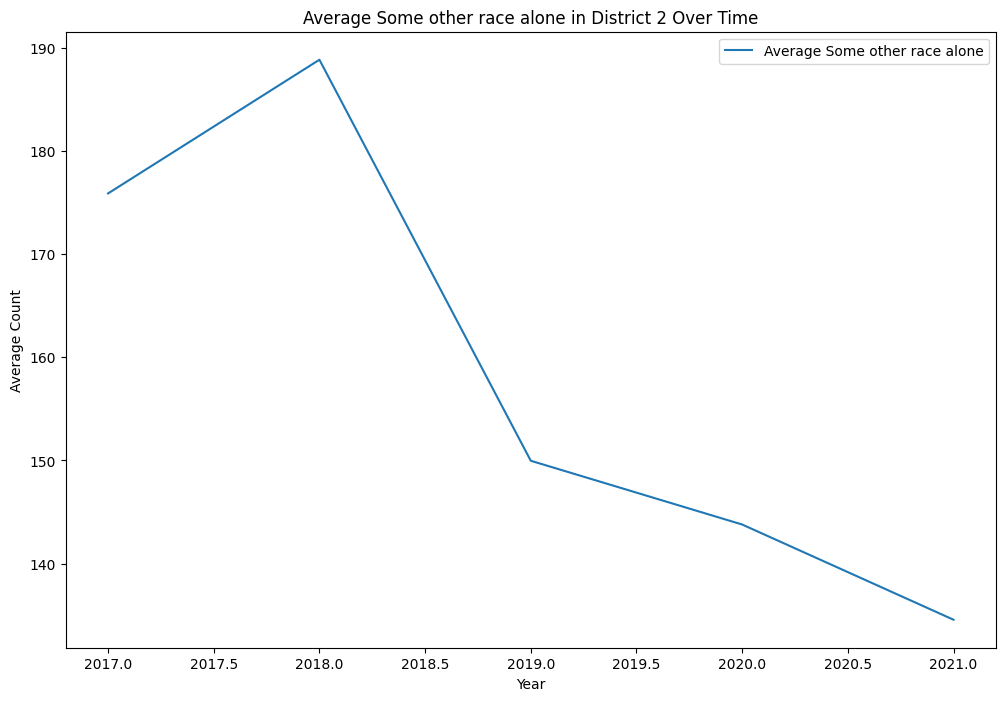

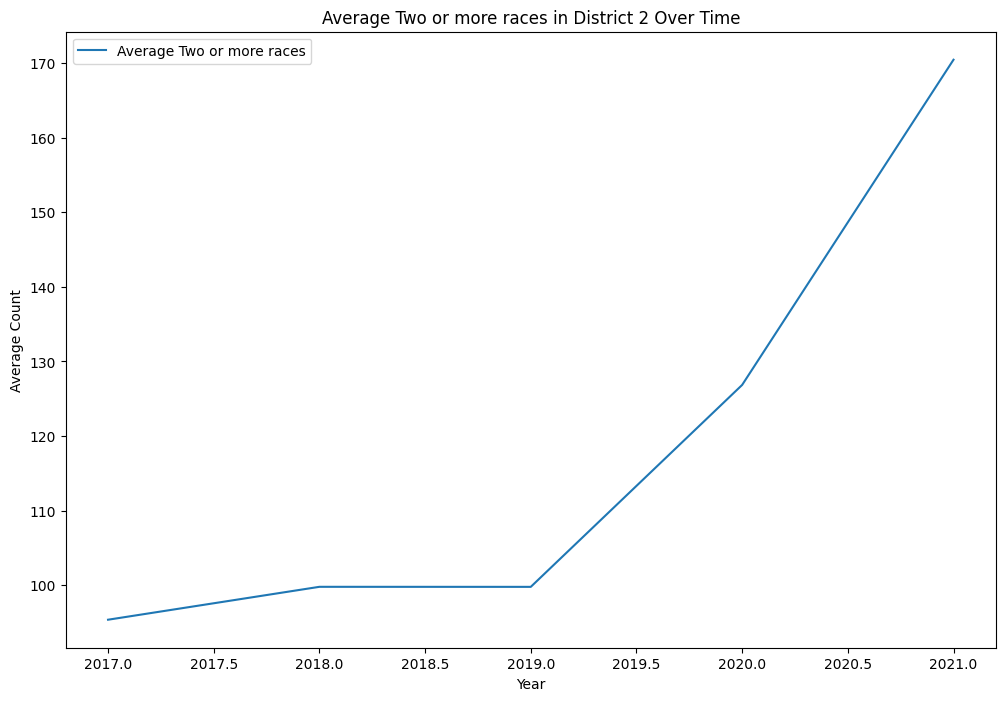

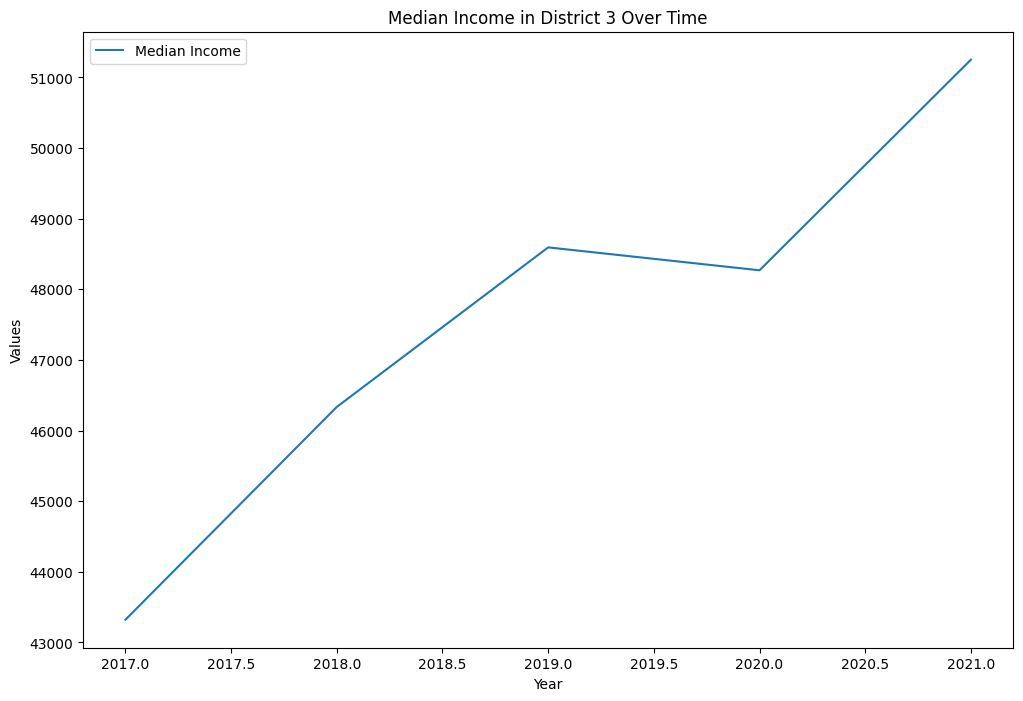

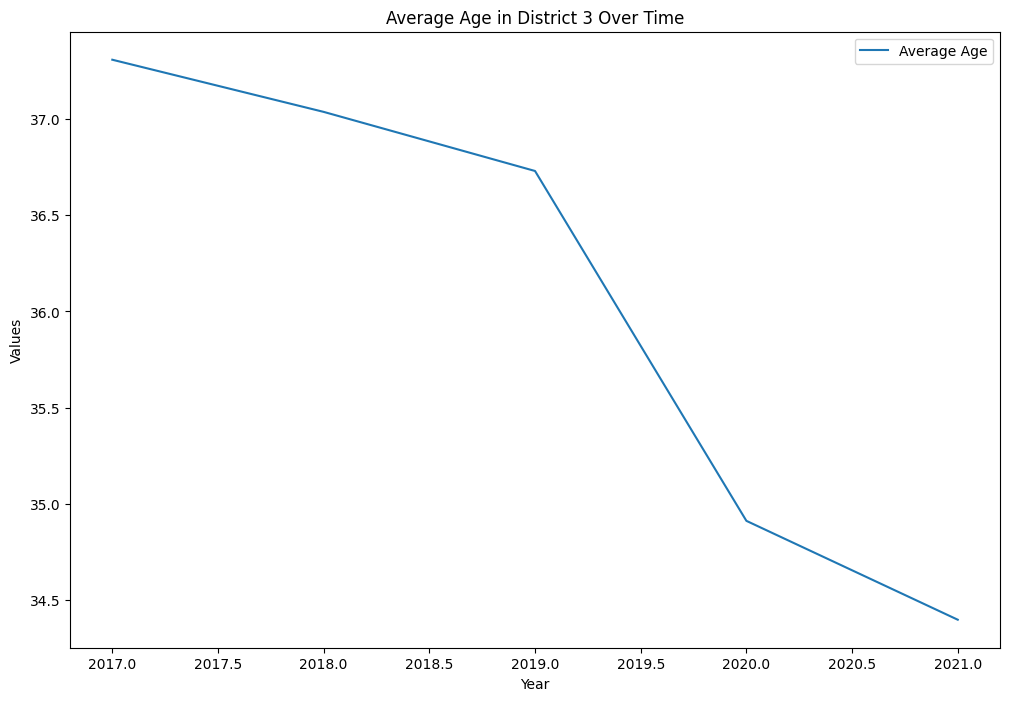

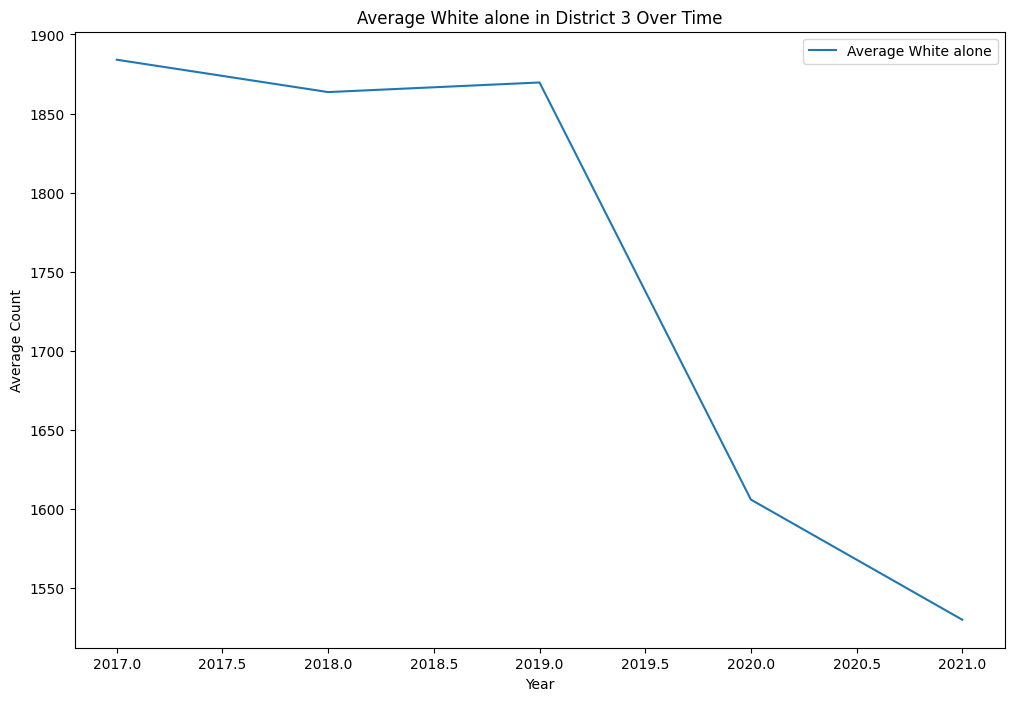

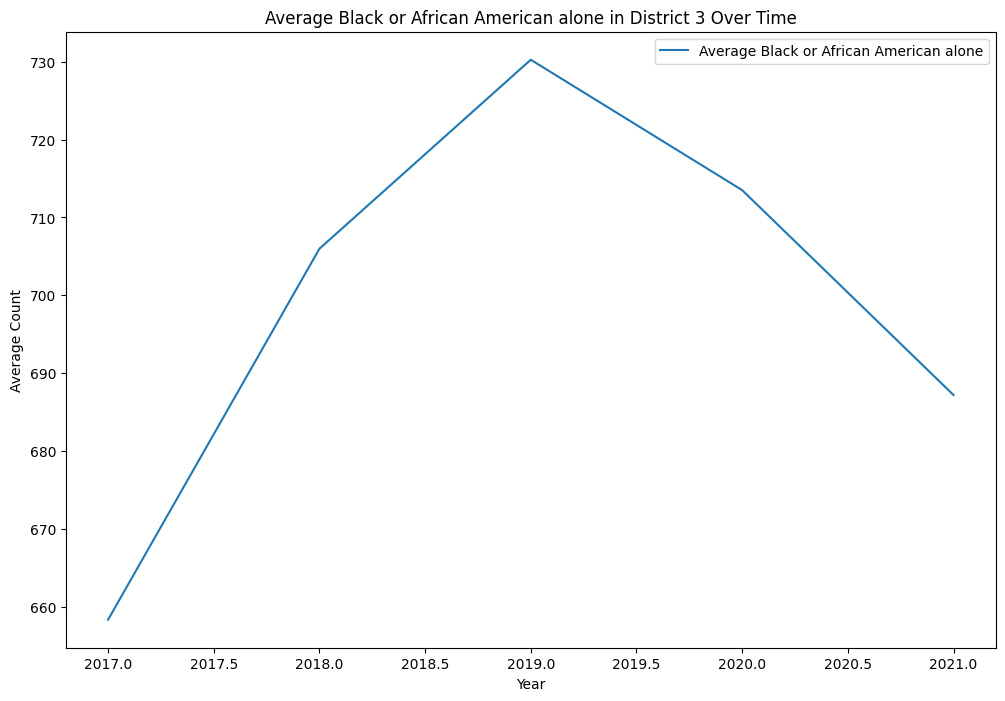

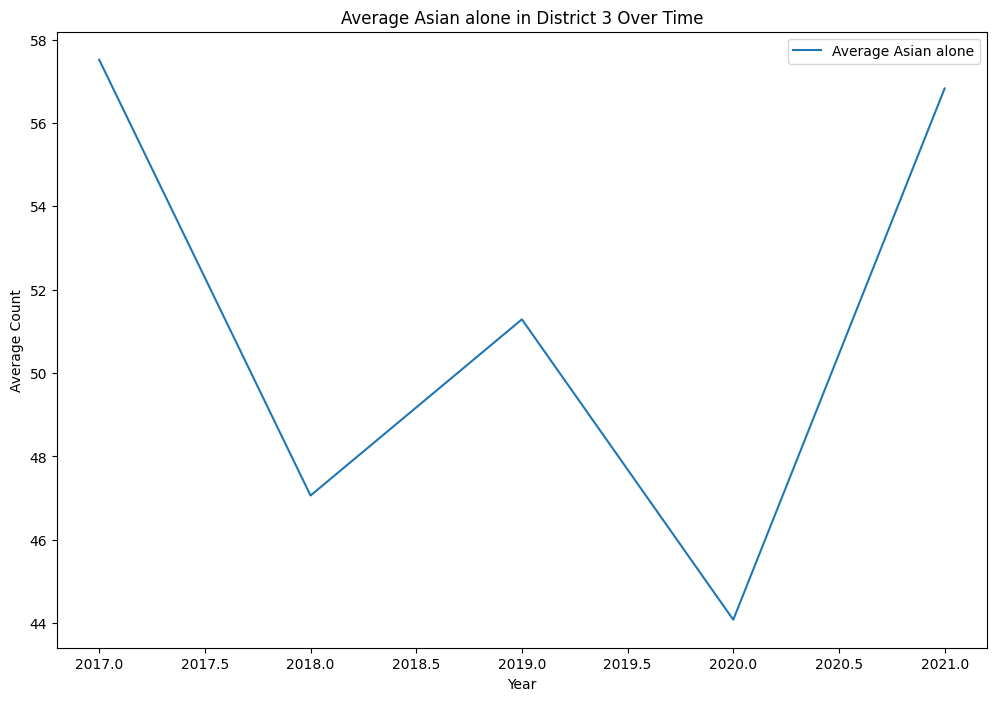

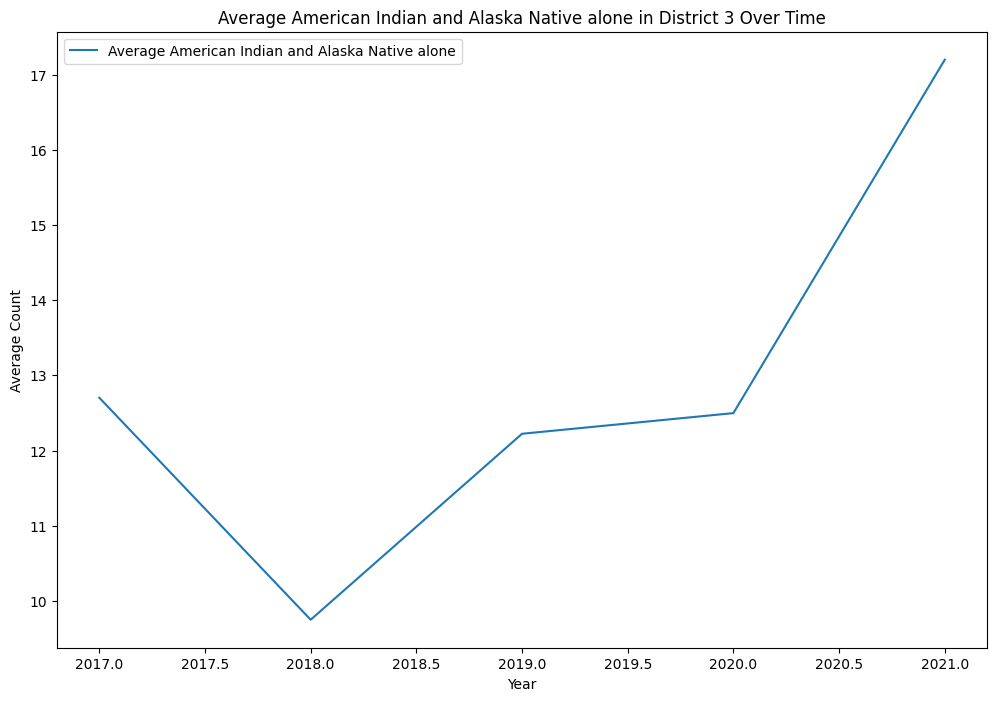

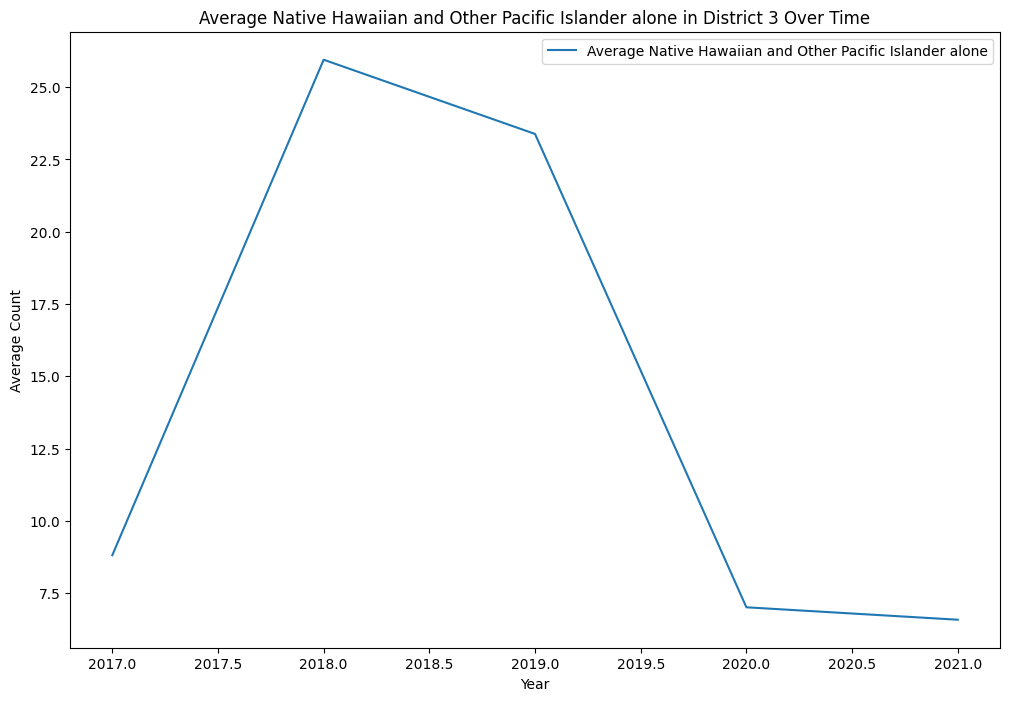

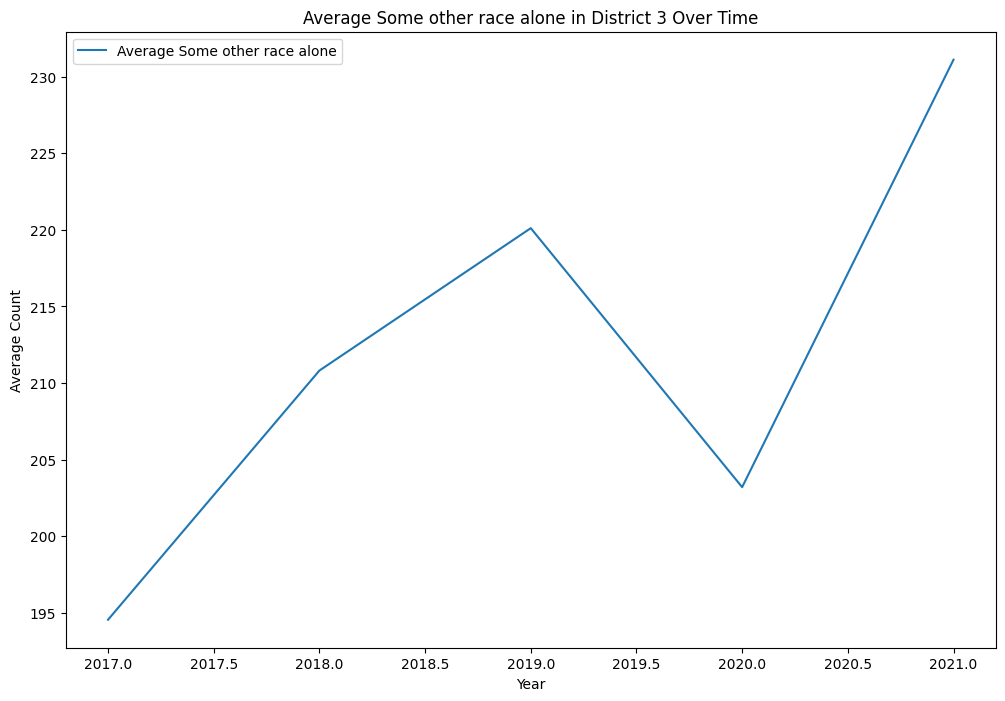

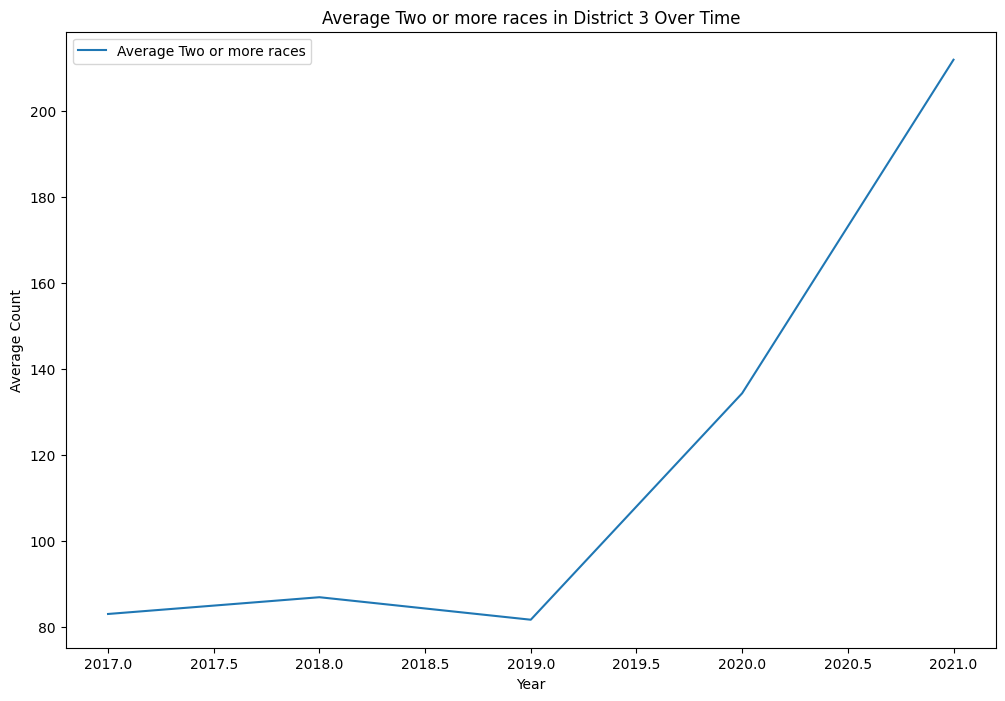

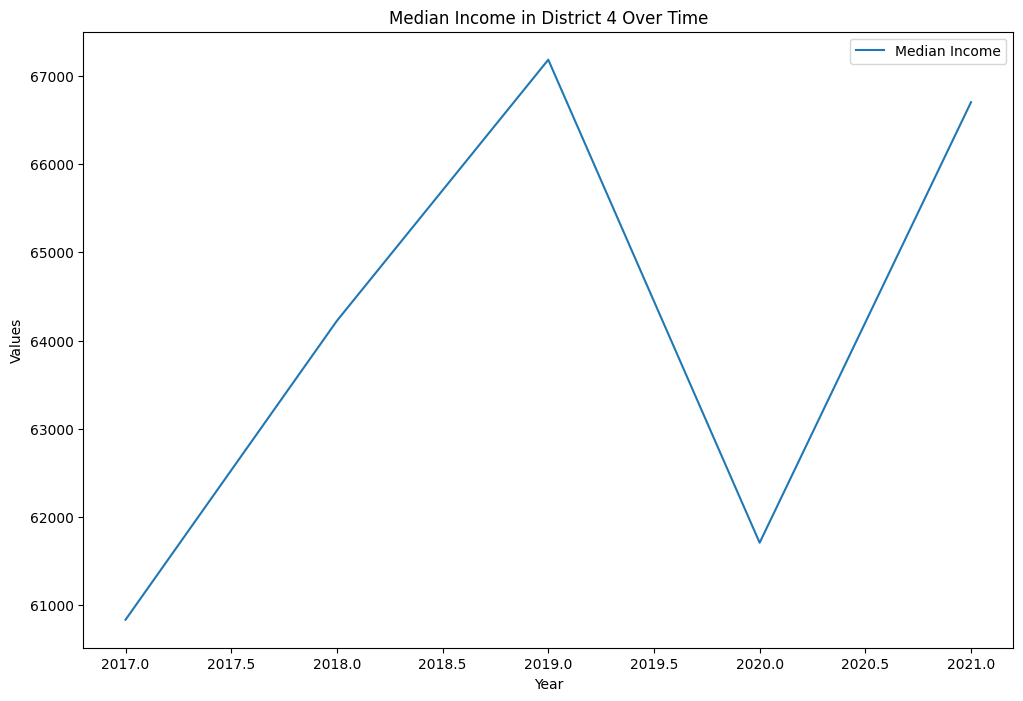

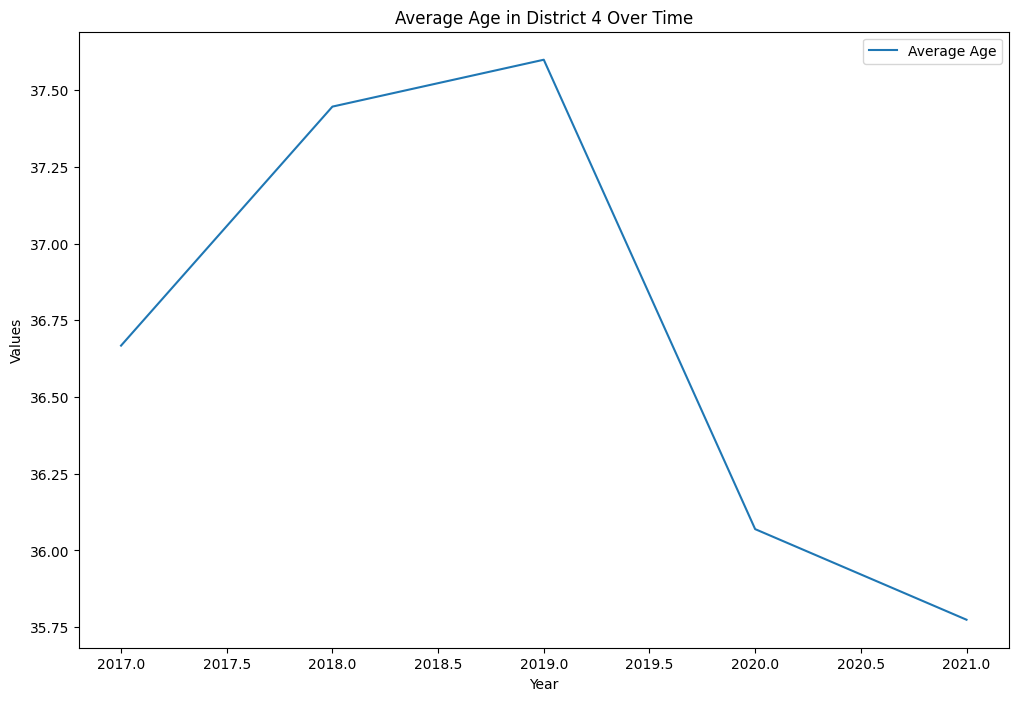

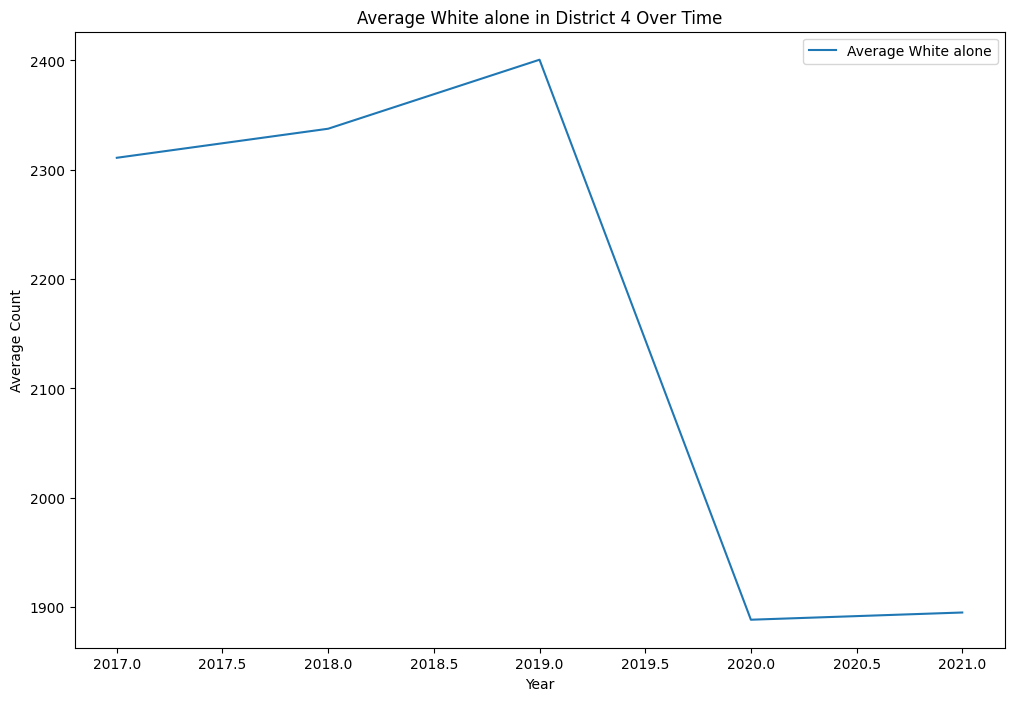

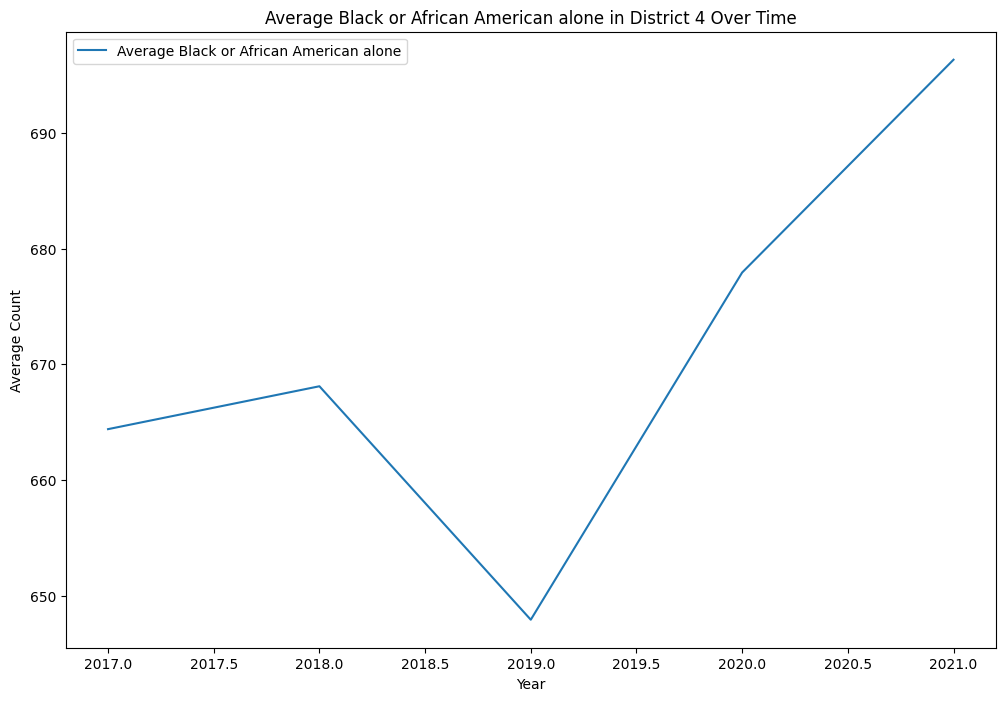

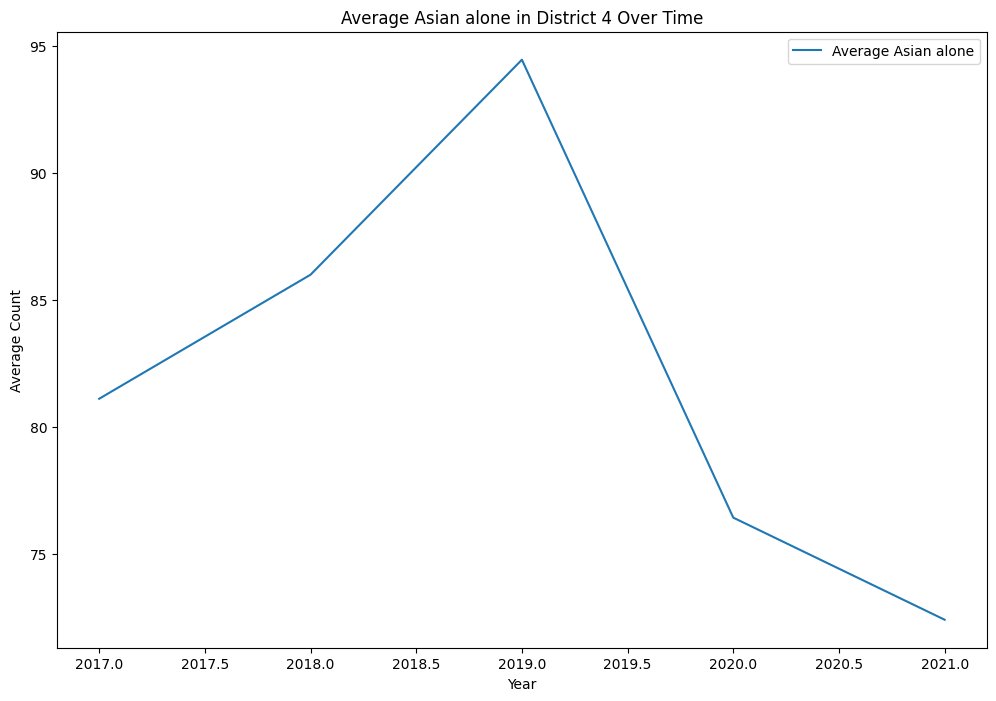

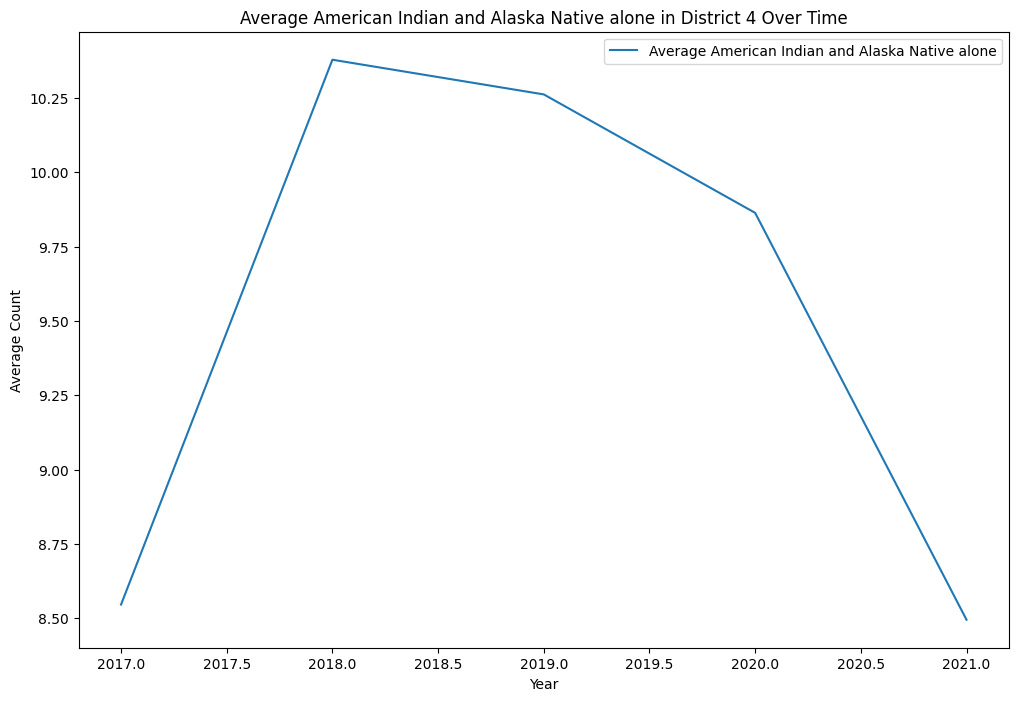

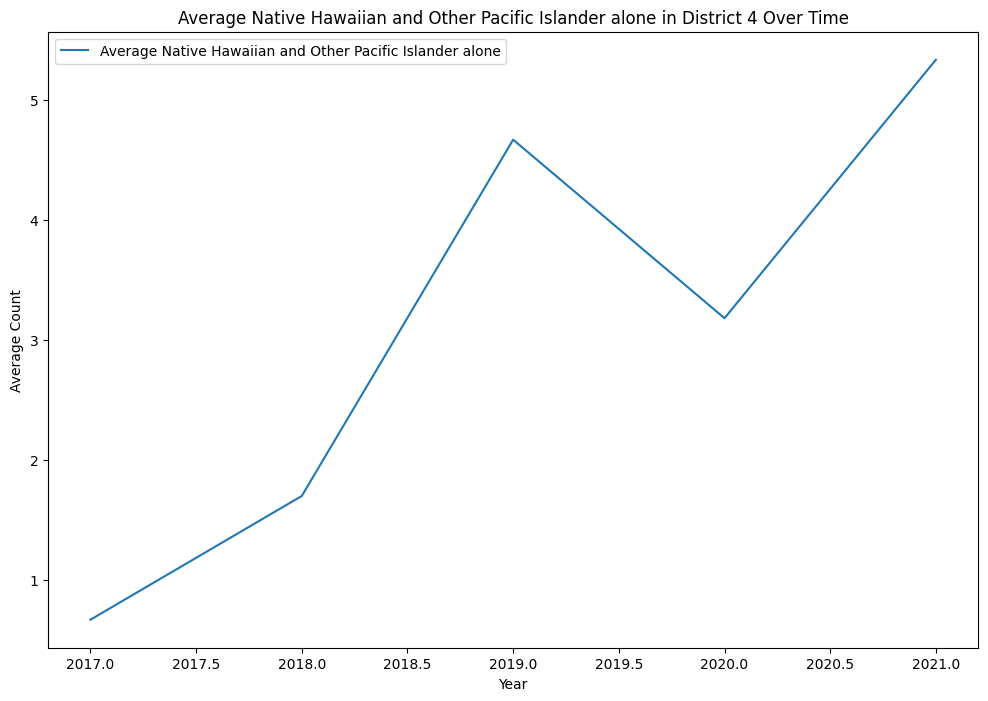

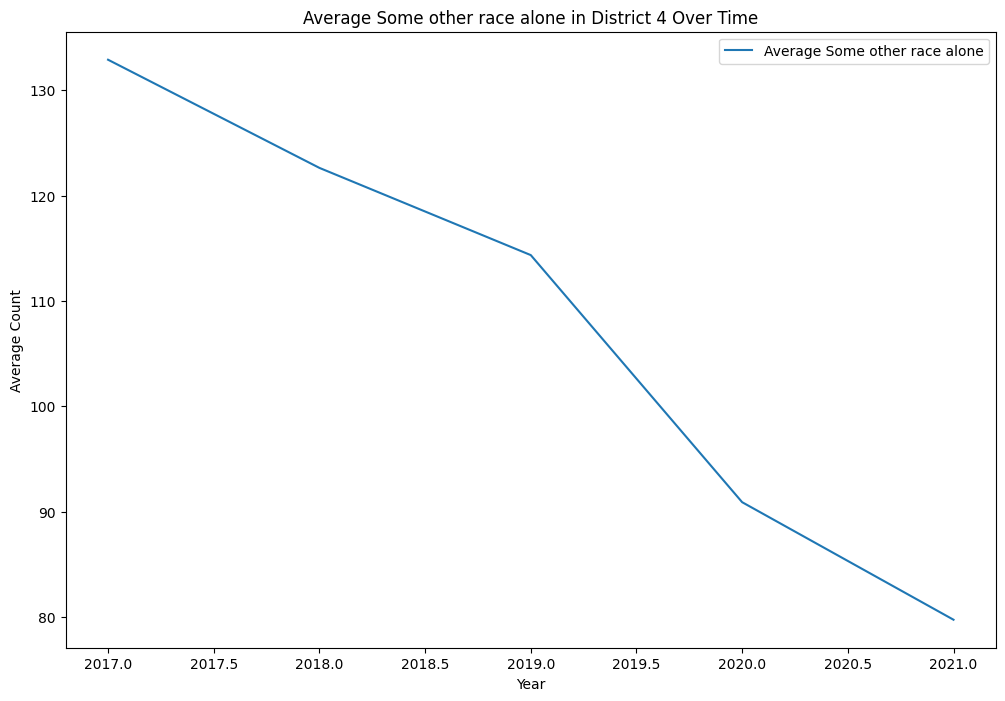

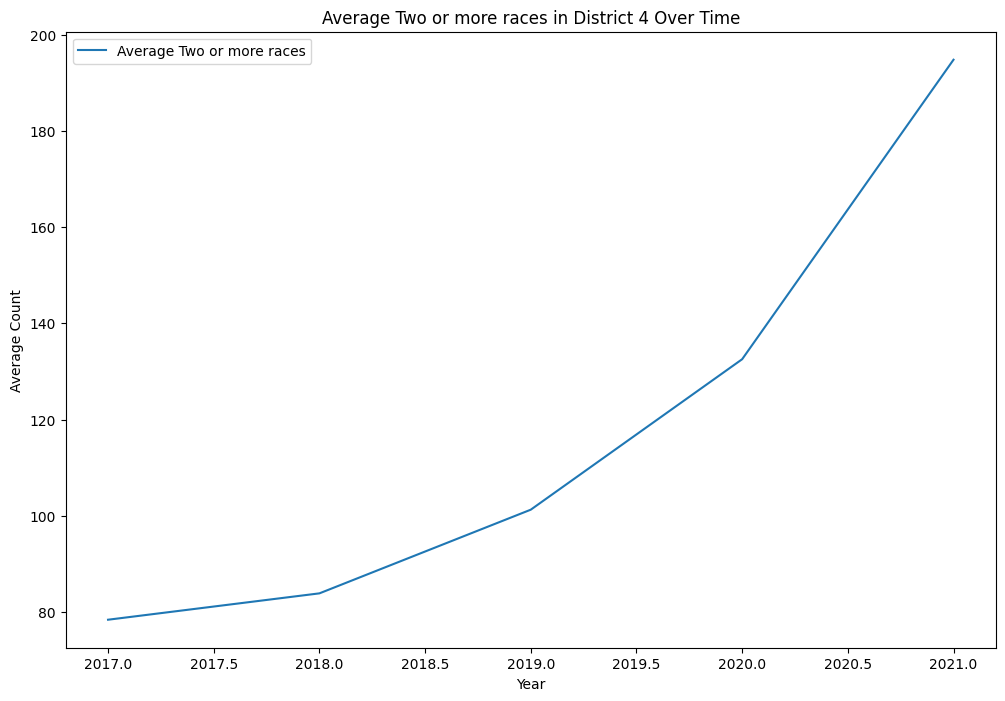

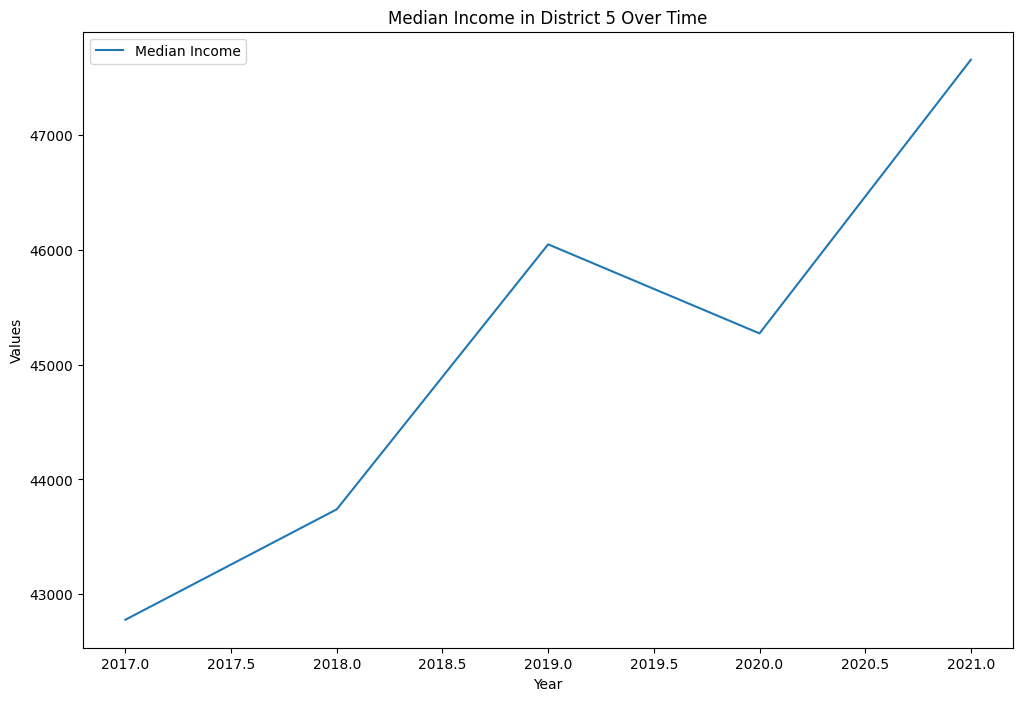

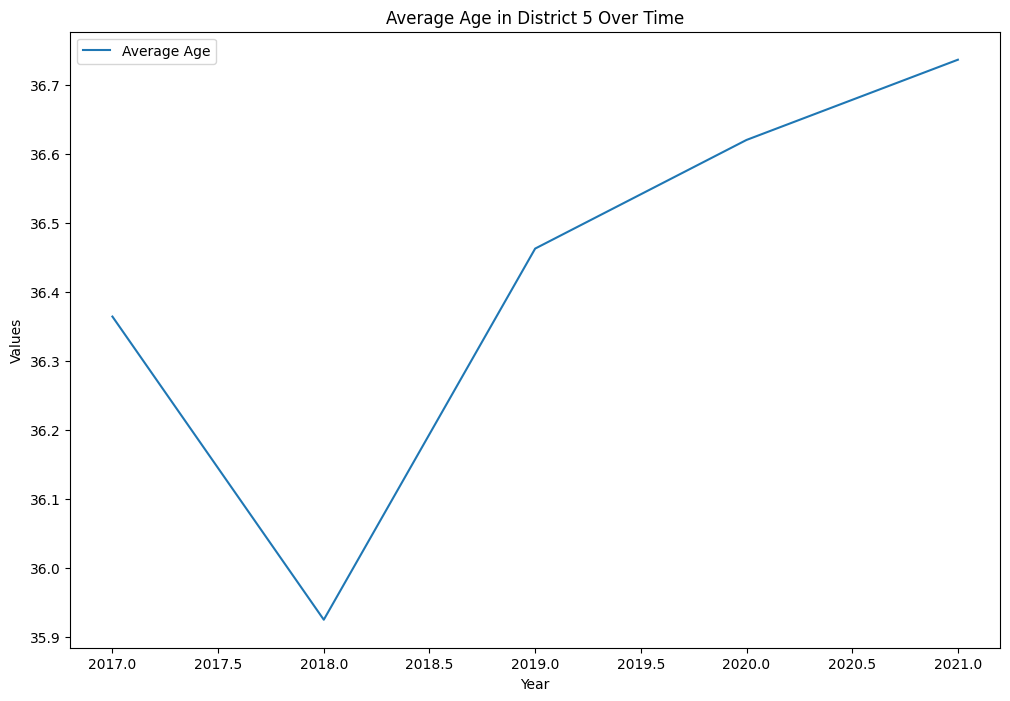

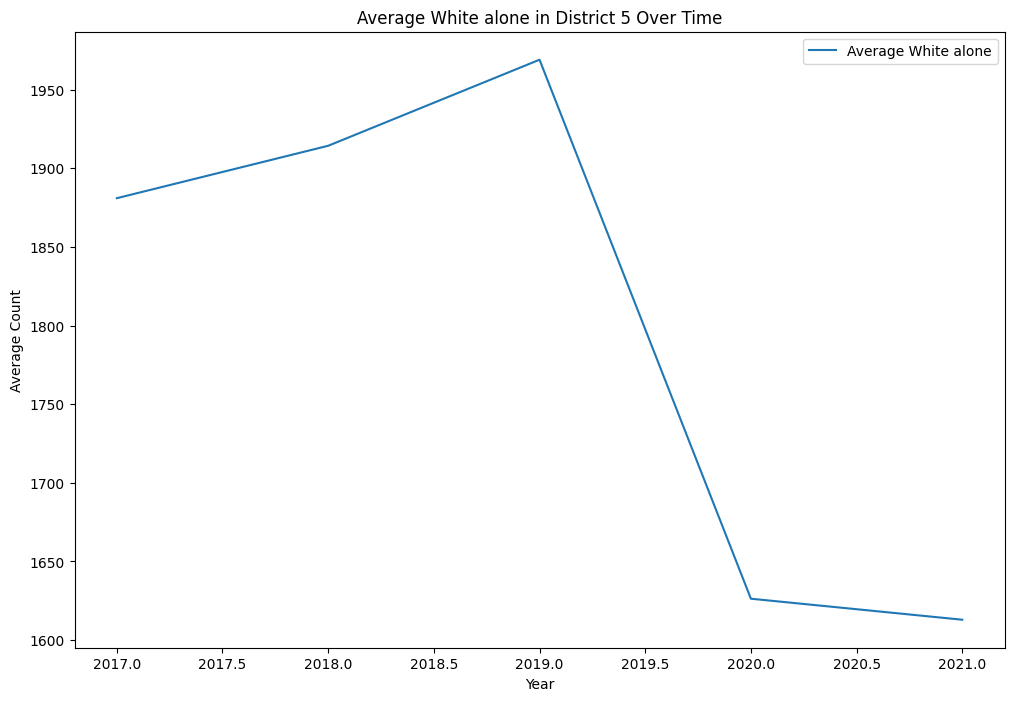

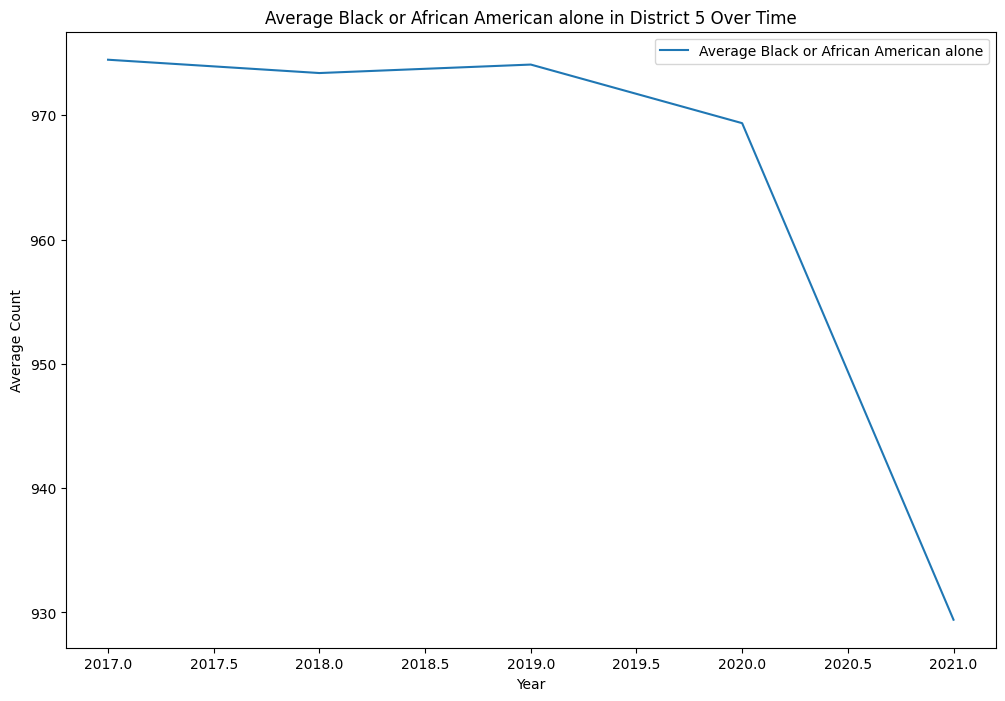

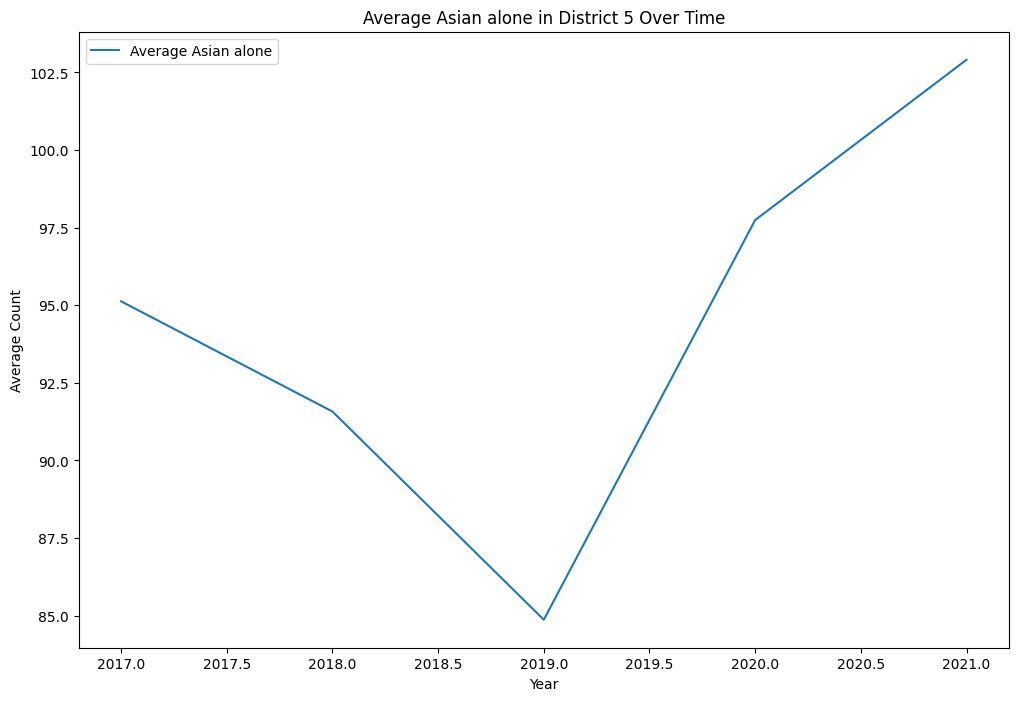

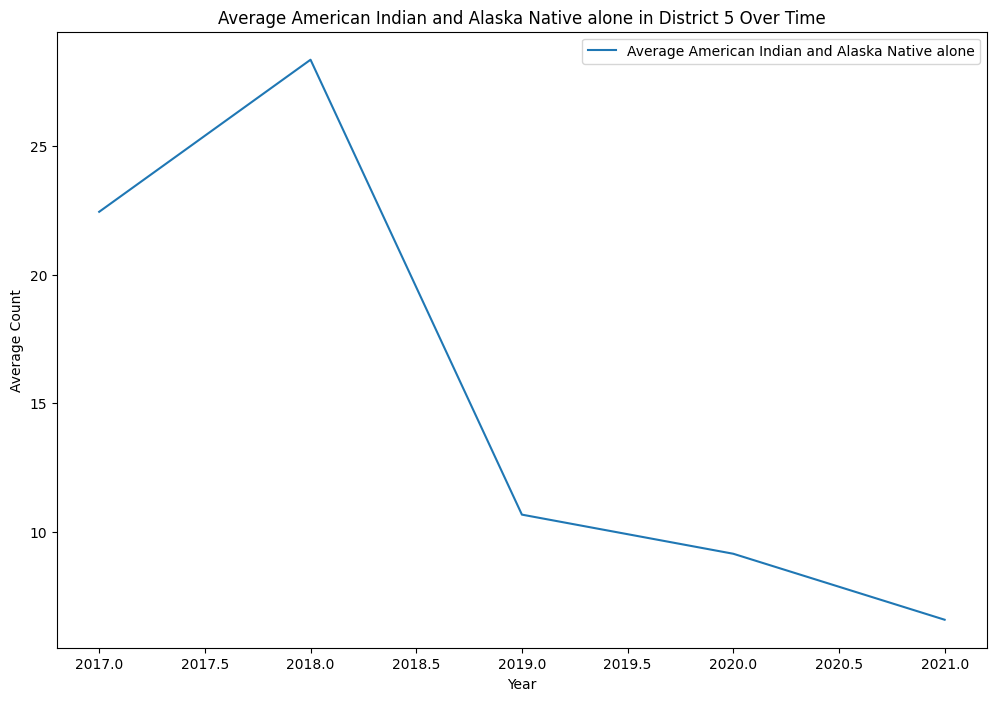

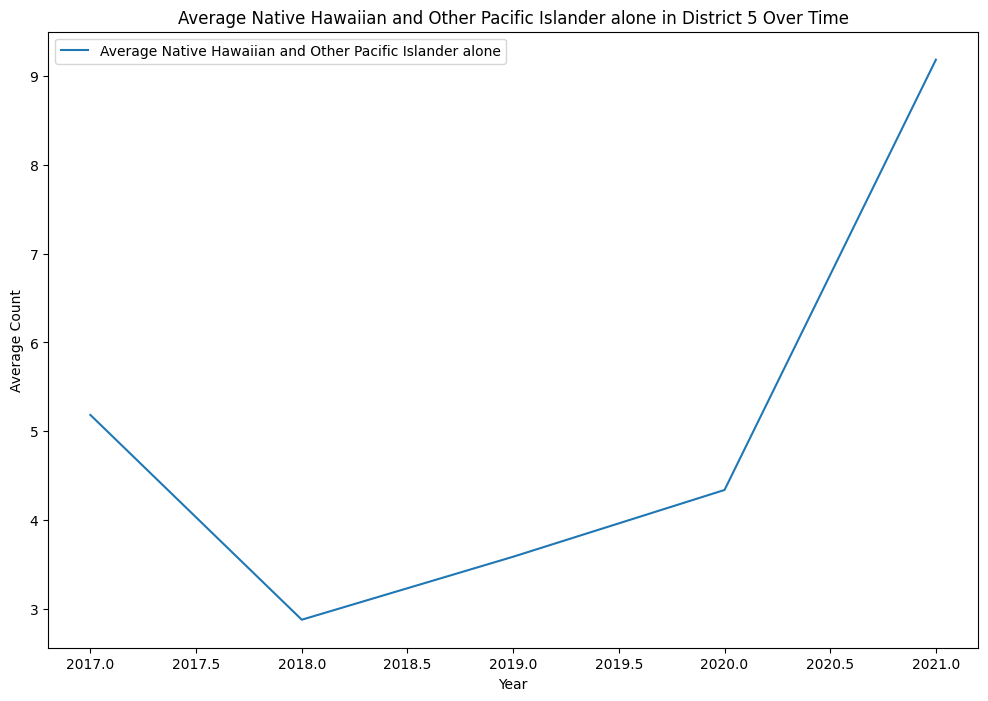

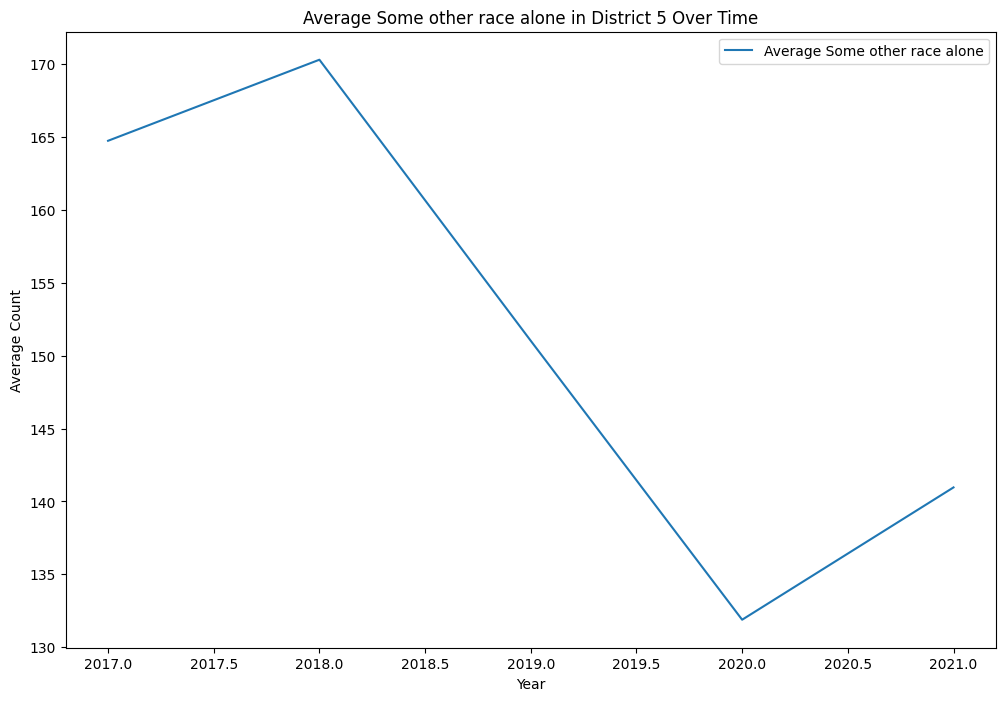

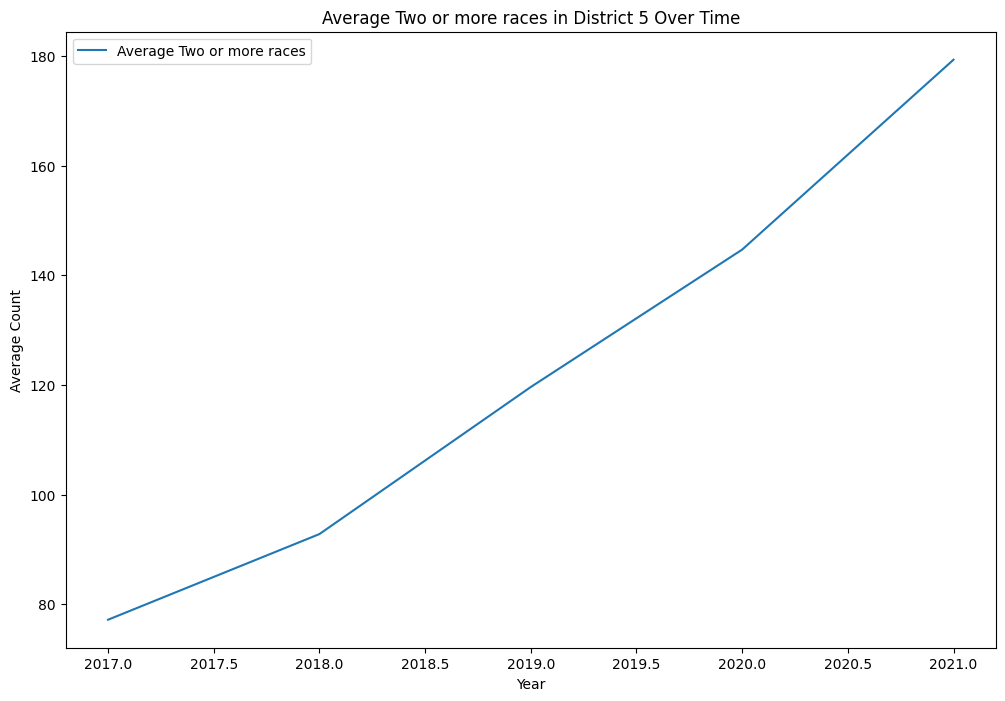

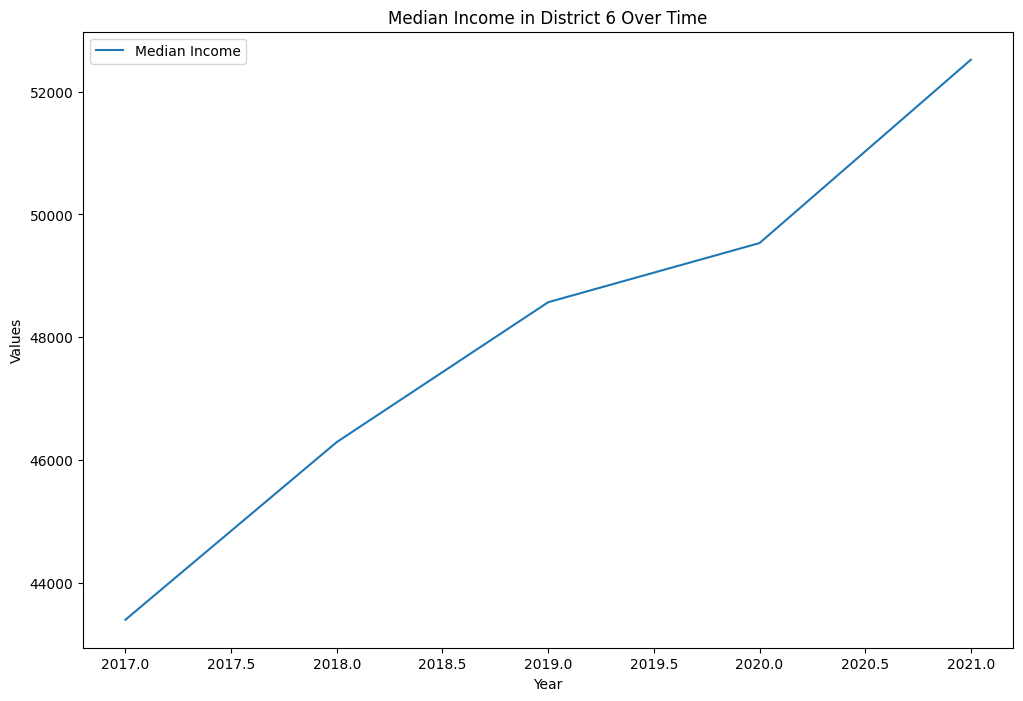

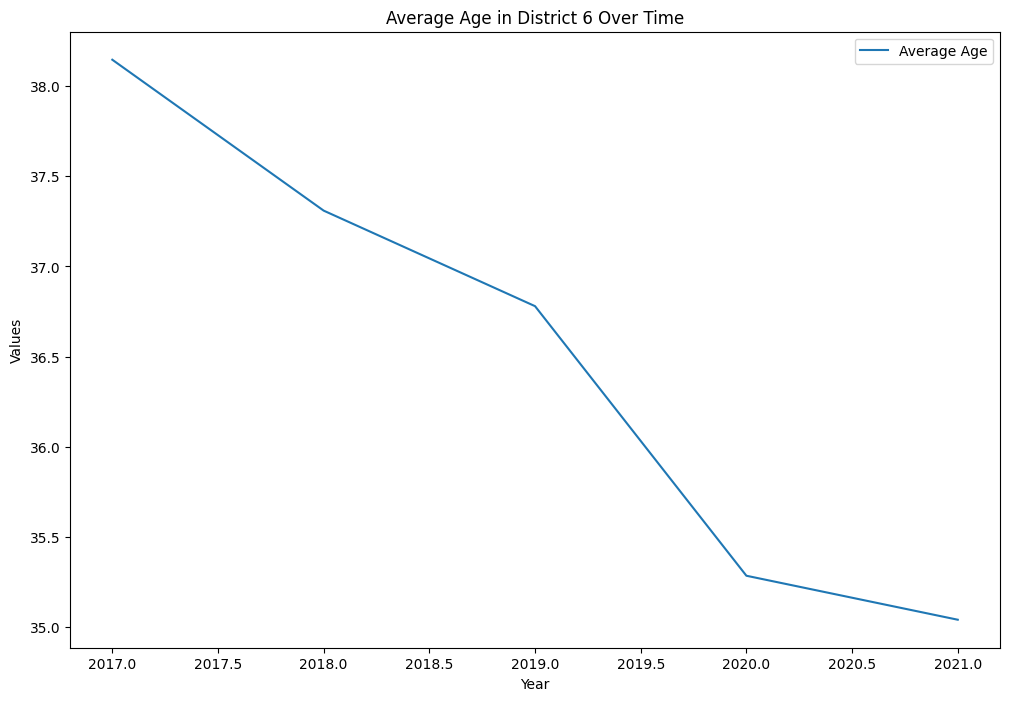

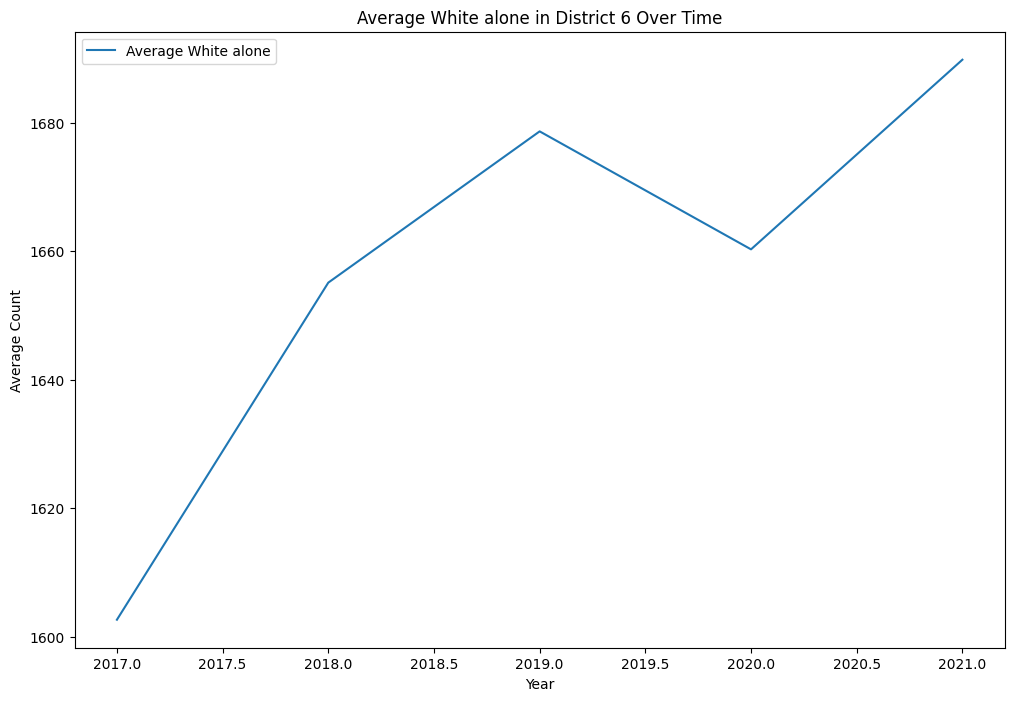

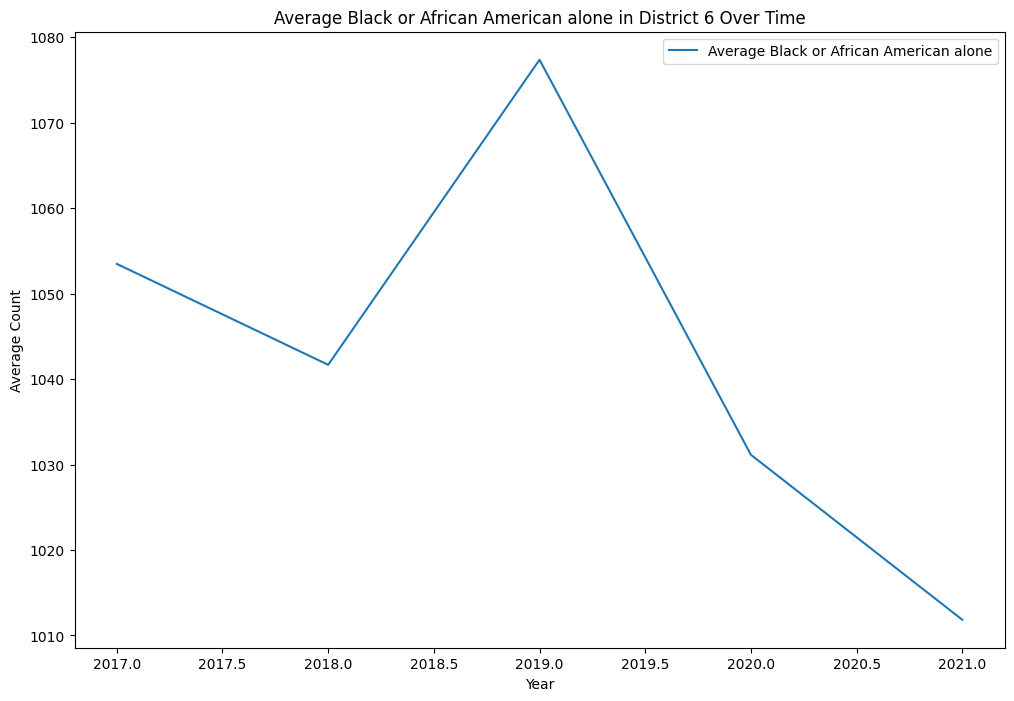

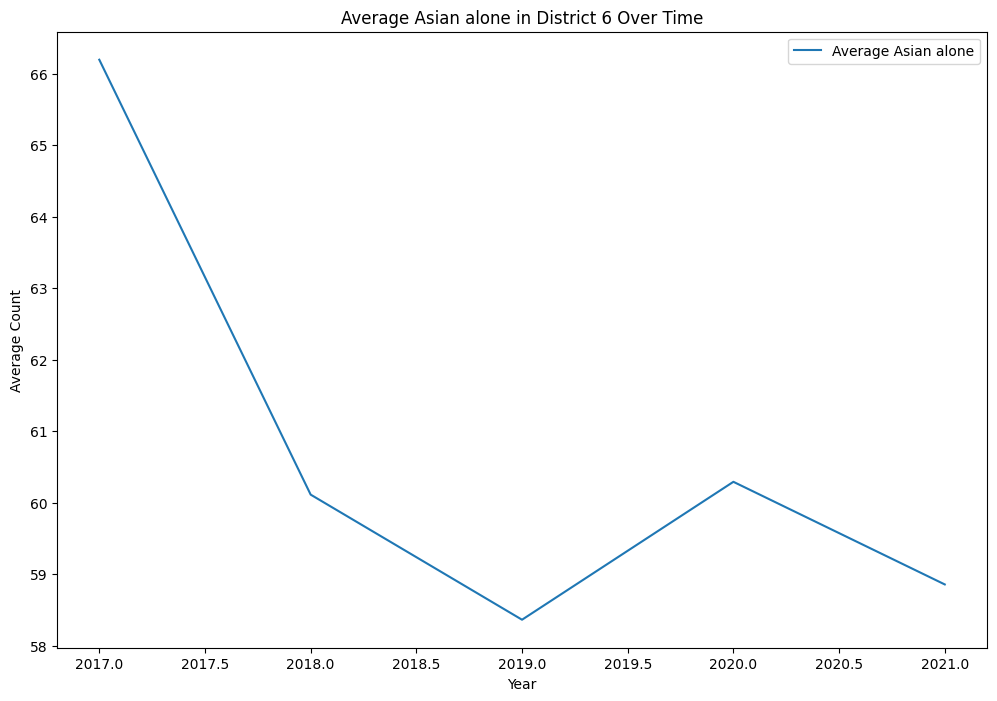

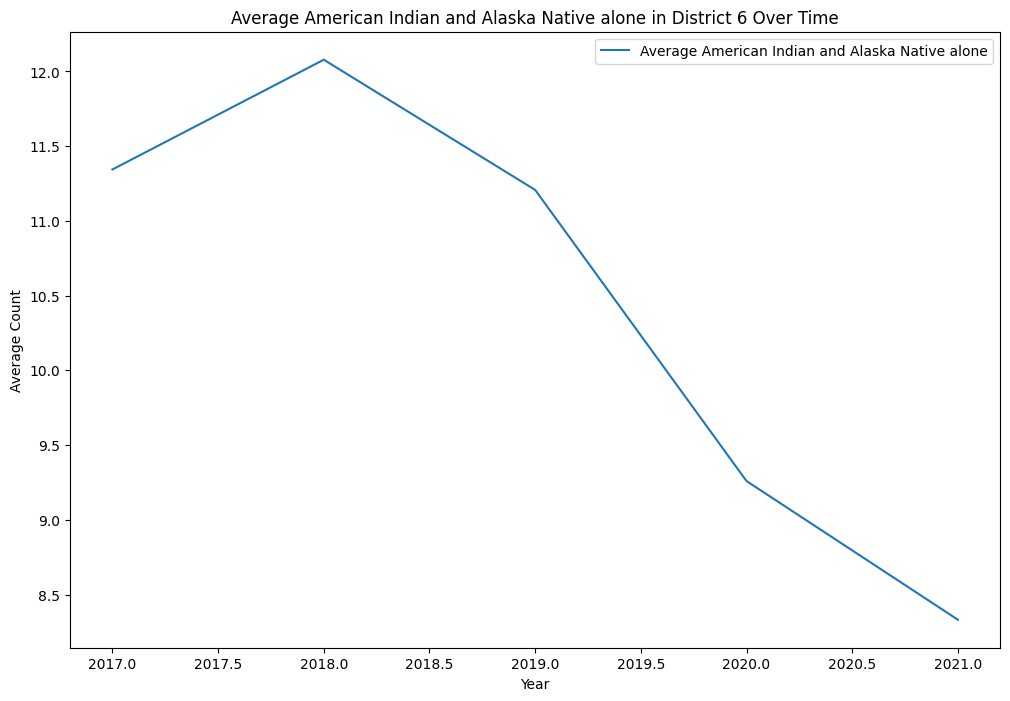

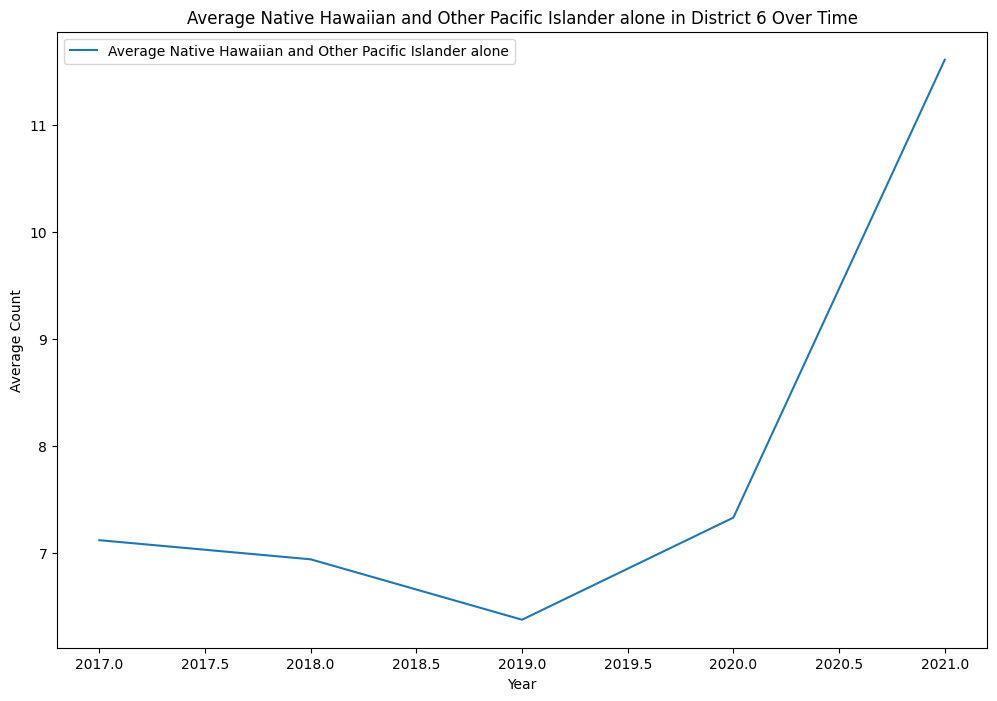

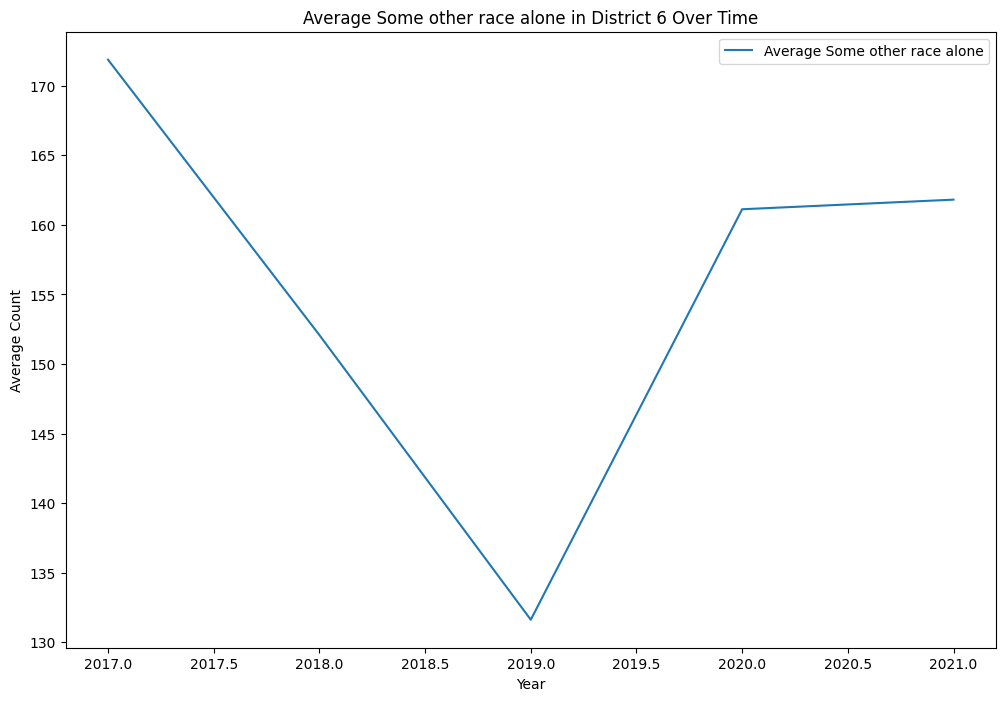

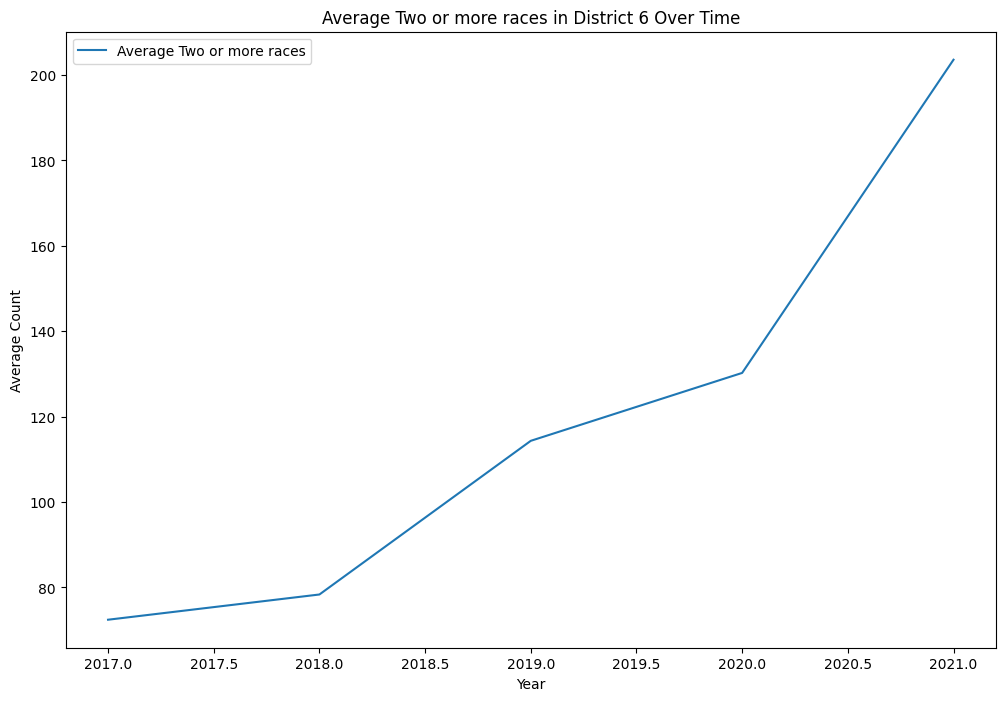

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
# Load the datasets
census_data = pd.read_csv('Census total.csv')
district_data = pd.read_csv('updated_districts_cleaned.csv')

# Process 'Census Tract' column and ensure 'year' is an integer
census_data['Census Tract'] = census_data['Census Tract'].str.extract('(\d+\.?\d*)')[0]
census_data['year'] = pd.to_numeric(census_data['year'], errors='coerce').astype('Int64')
district_data['Census Tract'] = district_data['Census Tract'].astype(str)

# Merge the data
combined_data = pd.merge(census_data, district_data, on='Census Tract', how='inner')

# Convert 'Median income (dollars)' to numeric
combined_data['Median income (dollars)'] = pd.to_numeric(combined_data['Median income (dollars)'], errors='coerce')

# Define and process all race columns
race_columns = ['White alone', 'Black or African American alone', 'Asian alone', 
                'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone', 
                'Some other race alone', 'Two or more races']
for col in race_columns:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce').fillna(0)

# Define age midpoints and calculate average age
age_midpoints = {'Under 5 years': 2.5, '5 to 9 years': 7.5, '10 to 14 years': 12.5, '15 to 19 years': 17.5, 
                 '20 to 24 years': 22.5, '25 to 29 years': 27.5, '30 to 34 years': 32.5, '35 to 39 years': 37.5, 
                 '40 to 44 years': 42.5, '45 to 49 years': 47.5, '50 to 54 years': 52.5, '55 to 59 years': 57.5, 
                 '60 to 64 years': 62.5, '65 to 69 years': 67.5, '70 to 74 years': 72.5, '75 to 79 years': 77.5, 
                 '80 to 84 years': 82.5}
for age_group in age_midpoints:
    if age_group in combined_data.columns:
        combined_data[age_group] = pd.to_numeric(combined_data[age_group], errors='coerce').fillna(0)
combined_data['Total years'] = sum(combined_data[col] * age_midpoints[col] for col in age_midpoints if col in combined_data.columns)
combined_data['Total Population'] = combined_data[[col for col in age_midpoints]].sum(axis=1)
combined_data['Average Age'] = combined_data['Total years'] / combined_data['Total Population']

# Iterate over each district and perform analysis
for district in range(1, 7):  # Assuming there are 6 districts numbered 1 to 6
    district_data = combined_data[combined_data['new district'] == district]
    
    # Select relevant columns for analysis
    analysis_columns = ['year', 'Median income (dollars)', 'Average Age'] + race_columns
    district_data = district_data[analysis_columns].dropna(subset=['year'])

    # Group by 'year' and calculate means
    yearly_data = district_data.groupby('year').mean()

    # Plotting for each district
    plt.figure(figsize=(12, 8))
    if 'Median income (dollars)' in yearly_data.columns:
        plt.plot(yearly_data['Median income (dollars)'], label='Median Income')
        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title(f'Median Income in District {district} Over Time')
        plt.legend()
        plt.show()

    if 'Average Age' in yearly_data.columns:
        plt.figure(figsize=(12, 8))
        plt.plot(yearly_data['Average Age'], label='Average Age')
        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title(f'Average Age in District {district} Over Time')
        plt.legend()
        plt.show()

    for race in race_columns:
        if race in yearly_data.columns:
            plt.figure(figsize=(12, 8))
            plt.plot(yearly_data[race], label=f'Average {race}')
            plt.xlabel('Year')
            plt.ylabel('Average Count')
            plt.title(f'Average {race} in District {district} Over Time')
            plt.legend()
            plt.show()
            